<a href="https://colab.research.google.com/github/ZemelakGoraga/Data-Analytics-Capstone/blob/main/live_animals_import_project_as_of_20th_Aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Topic:** "Unveiling Global Cattle Trade Patterns: Insights from
FAOSTAT's Dataset"

**Step 1. Understanding the Business Objective**

**Business Objective:**

To optimize cattle import and export strategies for different countries by analyzing historical data, identifying trends and anomalies, predicting future import quantities, and recommending prescriptive actions to maximize efficiency.

**Step 2. Business Questions:**


**Questions to address:**

1. Descriptive Question:
What are the trends in import and export quantities of cattle across different countries over the years?

2. Diagnostic Question:
Are there specific years or countries where there have been significant changes in cattle import or export quantity?

3. Predictive Question:
Can we predict the future import or export quantity of cattle for a specific country?

4. Prescriptive Question:
What strategies can be implemented to optimize cattle import and export quantities while considering different countries and years?

**Step 3. Data Collection & inspection:**

In [ ]:
# Data Collection
# Loading datasets from Kaggle
from google.colab import files
files.upload() # here the downloded kaggle.json file is imported

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zemelak","key":"08c8054de361c9898298da09f2007bec"}'}

In [ ]:

# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json



# Next, install the Kaggle API client.
!pip install -q kaggle


# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json


-rw-r--r-- 1 root root 63 Aug 21 19:38 kaggle.json


In [ ]:
# List the datasets
# 'kaggle datasets download -d unitednations/global-food-agriculture-statistics' this is the specific database we want to download from kaggle. N.B it may have multiple datasets. check

!kaggle datasets download -d unitednations/global-food-agriculture-statistics


 98% 433M/444M [00:04<00:00, 105MB/s] 
100% 444M/444M [00:04<00:00, 94.2MB/s]


In [ ]:
# unzip the different data files
# There are above 150 tables in the following zip file

import zipfile

# Specify the path to the downloaded ZIP file
zip_file_path = "/content/global-food-agriculture-statistics.zip"

# Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Get the list of file paths within the ZIP archive
    file_paths = zip_ref.namelist()

# Print the list of file paths
for path in file_paths:
    print(path)


current_FAO/__MACOSX/raw_files/._ASTI_Research_Spending_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._ASTI_Researchers_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._CommodityBalances_Crops_E_All_Data_(Normalized).csv
current_FAO/__MACOSX/raw_files/._CommodityBalances_LivestockFish_E_All_Data_(Normalized).csv
current_FAO/__MACOSX/raw_files/._ConsumerPriceIndices_E_All_Data_(Normalized).csv
current_FAO/__MACOSX/raw_files/._Deflators_E_All_Data_(Normalized).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Agriculture_total_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Burning_Savanna_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Burning_crop_residues_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Crop_Residues_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Cultivated_Organic_Soils_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissi

In [ ]:
# Download a specific table to work with
# Here, I will download the following table, which contains imported live animals and products:
#  Table to download: "current_FAO/raw_files/Trade_LiveAnimals_E_All_Data_(Normalized).csv", and save it as df

import pandas as pd
from zipfile import ZipFile

# Specify the CSV file to read from the ZIP archive
csv_file_to_read = "current_FAO/raw_files/Trade_LiveAnimals_E_All_Data_(Normalized).csv"

# Read the ZIP archive
with ZipFile("/content/global-food-agriculture-statistics.zip", 'r') as zip_file:
    # List the files within the ZIP archive (to double-check paths)
    print(zip_file.namelist())

    # Read the CSV file from the ZIP archive with the specified encoding and delimiter
    with zip_file.open(csv_file_to_read) as csv_file:
        df = pd.read_csv(csv_file, encoding='ISO-8859-1')


['current_FAO/__MACOSX/raw_files/._ASTI_Research_Spending_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._ASTI_Researchers_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._CommodityBalances_Crops_E_All_Data_(Normalized).csv', 'current_FAO/__MACOSX/raw_files/._CommodityBalances_LivestockFish_E_All_Data_(Normalized).csv', 'current_FAO/__MACOSX/raw_files/._ConsumerPriceIndices_E_All_Data_(Normalized).csv', 'current_FAO/__MACOSX/raw_files/._Deflators_E_All_Data_(Normalized).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Agriculture_total_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Burning_Savanna_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Burning_crop_residues_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Crop_Residues_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Cultivated_Organic_Soils_E_All_Data_(Norm).csv', 'curr

In [ ]:
# Viewing Data: display the first 5 rows of the df dataset

print(df.head())


   Area Code         Area  Item Code    Item  Element Code          Element  \
0          2  Afghanistan        866  Cattle          5608  Import Quantity   
1          2  Afghanistan        866  Cattle          5608  Import Quantity   
2          2  Afghanistan        866  Cattle          5608  Import Quantity   
3          2  Afghanistan        866  Cattle          5608  Import Quantity   
4          2  Afghanistan        866  Cattle          5608  Import Quantity   

   Year Code  Year  Unit  Value Flag  
0       1961  1961  Head    NaN    M  
1       1962  1962  Head    NaN    M  
2       1963  1963  Head    NaN    M  
3       1964  1964  Head    NaN    M  
4       1965  1965  Head    NaN    M  


In [ ]:
# Display the last 5 rows of the df dataset

print(df.tail())

        Area Code                                     Area  Item Code  \
662953       5817  Net Food Importing Developing Countries       1922   
662954       5817  Net Food Importing Developing Countries       1922   
662955       5817  Net Food Importing Developing Countries       1922   
662956       5817  Net Food Importing Developing Countries       1922   
662957       5817  Net Food Importing Developing Countries       1922   

                   Item  Element Code       Element  Year Code  Year  \
662953  Sheep and Goats          5922  Export Value       2009  2009   
662954  Sheep and Goats          5922  Export Value       2010  2010   
662955  Sheep and Goats          5922  Export Value       2011  2011   
662956  Sheep and Goats          5922  Export Value       2012  2012   
662957  Sheep and Goats          5922  Export Value       2013  2013   

            Unit      Value Flag  
662953  1000 US$   456293.0    A  
662954  1000 US$   421311.0    A  
662955  1000 US$   6493

In [ ]:
#Understanding the Structure
# Get the number of rows and columns : the data set has 662958 rows and 11 columns
num_rows, num_cols = df.shape
print(f"\nNumber of rows: {num_rows}")
print(f"Number of columns: {num_cols}")



Number of rows: 662958
Number of columns: 11


In [ ]:
# Display column names
print("\nColumn names:")
print(df.columns)



Column names:
Index(['Area Code', 'Area', 'Item Code', 'Item', 'Element Code', 'Element',
       'Year Code', 'Year', 'Unit', 'Value', 'Flag'],
      dtype='object')


In [ ]:
# Display unique values count for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nPotential Data Quality Issues (Categorical Columns):")
for column in categorical_columns:
    unique_values_count = df[column].nunique()
    print(f"{column}: {unique_values_count} unique values")



Potential Data Quality Issues (Categorical Columns):
Area: 252 unique values
Item: 25 unique values
Element: 4 unique values
Unit: 4 unique values
Flag: 5 unique values


In [ ]:
# Viewing unique values within each column

unique_areas = df['Area'].unique()

unique_items = df['Item'].unique()

unique_elements = df['Element'].unique()

unique_flags = df['Flag'].unique()

unique_years = df['Year'].unique()
unique_units = df['Unit'].unique()

print("Unique Areas:", unique_areas)

print("Unique Items:", unique_items)

print("Unique Elements:", unique_elements)

print("Unique Flags:", unique_flags)

print("Year:", unique_years)
print("Unit:", unique_units)

Unique Areas: ['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belgium-Luxembourg' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei Darussalam' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'China, Hong Kong SAR' 'China, Macao SAR' 'China, mainland'
 'China, Taiwan Province of' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 'Czechoslovakia' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Ethio

N.B. As we can understood from the 'Unit' column, the 'Value' column for cattle import and export quantity needs to be multiplied by 1000 heads for some countries. Similarly, the import and export values need to be multiplied by
1000 US$.

In [ ]:
# As the downloaded df dataset has several live animals and products,other then cattle,
# let us filter it to show only the cattle data as follows:
# the filtered data will show the import quantity (heads of cattle), export quantity (heads of cattle), import value (US$) and export value (US$) of cattle
cattle_df = df[(df['Item'] == 'Cattle')]
cattle_df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,866,Cattle,5608,Import Quantity,1961,1961,Head,NaN,M
1,2,Afghanistan,866,Cattle,5608,Import Quantity,1962,1962,Head,NaN,M
2,2,Afghanistan,866,Cattle,5608,Import Quantity,1963,1963,Head,NaN,M
3,2,Afghanistan,866,Cattle,5608,Import Quantity,1964,1964,Head,NaN,M
4,2,Afghanistan,866,Cattle,5608,Import Quantity,1965,1965,Head,NaN,M


In [ ]:
cattle_df.tail()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
660197,5817,Net Food Importing Developing Countries,866,Cattle,5922,Export Value,2009,2009,1000 US$,336022.0,A
660198,5817,Net Food Importing Developing Countries,866,Cattle,5922,Export Value,2010,2010,1000 US$,374253.0,A
660199,5817,Net Food Importing Developing Countries,866,Cattle,5922,Export Value,2011,2011,1000 US$,419817.0,A
660200,5817,Net Food Importing Developing Countries,866,Cattle,5922,Export Value,2012,2012,1000 US$,459030.0,A
660201,5817,Net Food Importing Developing Countries,866,Cattle,5922,Export Value,2013,2013,1000 US$,614724.0,A


In [ ]:
cattle_df.shape

(42800, 11)

In [ ]:
# Save copy of the 'cattle_df.csv' data in google drive
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Specify the directory path on Google Drive
drive_directory = '/content/drive/My Drive/YourDirectory'  # Replace 'YourDirectory' with your desired directory name

# Create the directory if it doesn't exist
os.makedirs(drive_directory, exist_ok=True)

# Assuming df is your DataFrame
# Read your dataset into a DataFrame if not already done
# df = pd.read_csv("cattle_df.csv")

# Specify the path on Google Drive where you want to save the file
drive_path = os.path.join(drive_directory, 'cattle_df.csv')

# Save the DataFrame to the specified path
df.to_csv(drive_path, index=False)

print("File saved to Google Drive:", drive_path)


Mounted at /content/drive
File saved to Google Drive: /content/drive/My Drive/YourDirectory/cattle_df.csv


In [ ]:
# Select only required columns for analysis and save the data as cattle_filtered_df

selected_columns = ['Area', 'Item', 'Element', 'Year', 'Unit', 'Value']
cattle_filtered_df = cattle_df[selected_columns]
print("Selected Data:")
print(cattle_filtered_df.head())

Selected Data:
          Area    Item          Element  Year  Unit  Value
0  Afghanistan  Cattle  Import Quantity  1961  Head    NaN
1  Afghanistan  Cattle  Import Quantity  1962  Head    NaN
2  Afghanistan  Cattle  Import Quantity  1963  Head    NaN
3  Afghanistan  Cattle  Import Quantity  1964  Head    NaN
4  Afghanistan  Cattle  Import Quantity  1965  Head    NaN


In [ ]:
cattle_filtered_df.tail()

,Area,Item,Element,Year,Unit,Value
660197,Net Food Importing Developing Countries,Cattle,Export Value,2009,1000 US$,336022.0
660198,Net Food Importing Developing Countries,Cattle,Export Value,2010,1000 US$,374253.0
660199,Net Food Importing Developing Countries,Cattle,Export Value,2011,1000 US$,419817.0
660200,Net Food Importing Developing Countries,Cattle,Export Value,2012,1000 US$,459030.0
660201,Net Food Importing Developing Countries,Cattle,Export Value,2013,1000 US$,614724.0


In [ ]:
# Next, let us rename the 'Area' column by 'Country' and remove the 'Item' column as cattle is the only unique value in it

# Rename the 'Area' column to 'Country'
cattle_filtered_df.rename(columns={'Area': 'Country'}, inplace=True)

# Remove the 'Item' column
cattle_filtered_df = cattle_filtered_df.drop(columns=['Item'])

# Print the updated DataFrame
print(cattle_filtered_df.head())

       Country          Element  Year  Unit  Value
0  Afghanistan  Import Quantity  1961  Head    NaN
1  Afghanistan  Import Quantity  1962  Head    NaN
2  Afghanistan  Import Quantity  1963  Head    NaN
3  Afghanistan  Import Quantity  1964  Head    NaN
4  Afghanistan  Import Quantity  1965  Head    NaN


<ipython-input-20-1ab88629884c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cattle_filtered_df.rename(columns={'Area': 'Country'}, inplace=True)


 Let us further check the dataset to multiply the 'Value' column for cattle import and export quntity by 1000 (head) and import and export value by 1000 ($ US), where necessary.

In [ ]:
# Select the subset where 'Unit' is '1000 US$'
# As we can see below, there are a total of 21453 rows of the dataset where the 'Unit' column is '1000 US$'

subset_cattle_filtered_df = cattle_filtered_df[cattle_filtered_df['Unit'] == '1000 US$']

# Print the selected subset DataFrame
print(subset_cattle_filtered_df)


                                        Country       Element  Year      Unit  \
53                                  Afghanistan  Import Value  1961  1000 US$   
54                                  Afghanistan  Import Value  1962  1000 US$   
55                                  Afghanistan  Import Value  1963  1000 US$   
56                                  Afghanistan  Import Value  1964  1000 US$   
57                                  Afghanistan  Import Value  1965  1000 US$   
...                                         ...           ...   ...       ...   
660197  Net Food Importing Developing Countries  Export Value  2009  1000 US$   
660198  Net Food Importing Developing Countries  Export Value  2010  1000 US$   
660199  Net Food Importing Developing Countries  Export Value  2011  1000 US$   
660200  Net Food Importing Developing Countries  Export Value  2012  1000 US$   
660201  Net Food Importing Developing Countries  Export Value  2013  1000 US$   

           Value  
53      

In [ ]:
# Select the subset where 'Unit' is '1000 Head'
# As we can see below, there is no row of the dataset where the 'Unit' column is '1000 Head', so there is no need to multiply the quantity by 1000 head
subset_cattle_filtered_df = cattle_filtered_df[cattle_filtered_df['Unit'] == '1000 Head']

# Print the selected subset DataFrame
print(subset_cattle_filtered_df)

Empty DataFrame
Columns: [Country, Element, Year, Unit, Value]
Index: []


In [ ]:
# Let us multiply the 'Value' column for the import and export values by '1000 US$' as follows:

# Create a boolean mask for rows where 'Unit' is '1000 US$'
mask = cattle_filtered_df['Unit'] == '1000 US$'

# Multiply 'Value' column by 1000 for the selected rows
cattle_filtered_df.loc[mask, 'Value'] = cattle_filtered_df.loc[mask, 'Value'] * 1000

# Print the updated DataFrame
print(cattle_filtered_df)


                                        Country          Element  Year  \
0                                   Afghanistan  Import Quantity  1961   
1                                   Afghanistan  Import Quantity  1962   
2                                   Afghanistan  Import Quantity  1963   
3                                   Afghanistan  Import Quantity  1964   
4                                   Afghanistan  Import Quantity  1965   
...                                         ...              ...   ...   
660197  Net Food Importing Developing Countries     Export Value  2009   
660198  Net Food Importing Developing Countries     Export Value  2010   
660199  Net Food Importing Developing Countries     Export Value  2011   
660200  Net Food Importing Developing Countries     Export Value  2012   
660201  Net Food Importing Developing Countries     Export Value  2013   

            Unit        Value  
0           Head          NaN  
1           Head          NaN  
2           Hea

In [ ]:
cattle_filtered_df.shape

(42800, 5)

In [ ]:
# Let us remove the 'Unit' column from the cattle_filtered_df dataset

# Remove the 'Unit' column
cattle_filtered_df = cattle_filtered_df.drop(columns=['Unit'])

# Print the updated DataFrame
print(cattle_filtered_df)


                                        Country          Element  Year  \
0                                   Afghanistan  Import Quantity  1961   
1                                   Afghanistan  Import Quantity  1962   
2                                   Afghanistan  Import Quantity  1963   
3                                   Afghanistan  Import Quantity  1964   
4                                   Afghanistan  Import Quantity  1965   
...                                         ...              ...   ...   
660197  Net Food Importing Developing Countries     Export Value  2009   
660198  Net Food Importing Developing Countries     Export Value  2010   
660199  Net Food Importing Developing Countries     Export Value  2011   
660200  Net Food Importing Developing Countries     Export Value  2012   
660201  Net Food Importing Developing Countries     Export Value  2013   

              Value  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4

In [ ]:
# Let us keep the 'cattle_filtered_df'dataset as it is and make its copy as df1 for further data processing

df1 = cattle_filtered_df.copy()
df1.head()


,Country,Element,Year,Value
0,Afghanistan,Import Quantity,1961,NaN
1,Afghanistan,Import Quantity,1962,NaN
2,Afghanistan,Import Quantity,1963,NaN
3,Afghanistan,Import Quantity,1964,NaN
4,Afghanistan,Import Quantity,1965,NaN


In [ ]:
df1.tail()

,Country,Element,Year,Value
660197,Net Food Importing Developing Countries,Export Value,2009,336022000.0
660198,Net Food Importing Developing Countries,Export Value,2010,374253000.0
660199,Net Food Importing Developing Countries,Export Value,2011,419817000.0
660200,Net Food Importing Developing Countries,Export Value,2012,459030000.0
660201,Net Food Importing Developing Countries,Export Value,2013,614724000.0


In [ ]:
df1.shape

(42800, 4)

In [ ]:
# save copy of df1 as df2
df2 = df1.copy()

In [ ]:
# Check for missing values in each column
missing_values = df2.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
Country       0
Element       0
Year          0
Value      2717
dtype: int64


In [ ]:
# Let us sort missing values by unique values in the 'Elelemnt' column: Import Quantity, Import Value, Export Quantity and Export Value of cattle

# Get the unique values in the 'Element' column and sort them
unique_elements = sorted(df2['Element'].unique())

# Create an empty DataFrame to store missing value counts
missing_values_df2 = pd.DataFrame(columns=unique_elements)

# Iterate through unique elements and calculate missing value counts
for element in unique_elements:
    subset = df2[df2['Element'] == element]
    missing_counts = subset.isnull().sum()
    missing_values_df2[element] = missing_counts

# Print the DataFrame with missing value counts
print(missing_values_df2)


         Export Quantity  Export Value  Import Quantity  Import Value
Country                0             0                0             0
Element                0             0                0             0
Year                   0             0                0             0
Value                657           656              686           718


In [ ]:
# Replace missing values by Median
import pandas as pd

# Assuming df2 is your DataFrame
# Read your dataset into a DataFrame if not already done
# df2 = pd.read_csv("your_dataset.csv")

# Sort the DataFrame by the 'Element' column
df2 = df2.sort_values(by='Element')

# Get the unique values in the 'Element' column and sort them
unique_elements = sorted(df2['Element'].unique())

# Create an empty DataFrame to store missing value counts
missing_values_df2 = pd.DataFrame(columns=unique_elements)

# Create a dictionary to store median values for each element
median_values = {}

# Iterate through unique elements and calculate missing value counts
for element in unique_elements:
    subset = df2[df2['Element'] == element]
    missing_counts = subset.isnull().sum()
    missing_values_df2[element] = missing_counts

    # Calculate median value for each subset
    median_value = subset['Value'].median()
    median_values[element] = median_value

    print(f"median value for {element} subset: {median_value:.2f}")

# Print the DataFrame with missing value counts
print("\nMissing value counts:")
print(missing_values_df2)

# Replace missing values by median values for each unique element
for element in unique_elements:
    subset = df2[df2['Element'] == element]
    median_value = median_values[element]
    df2.loc[subset.index, 'Value'] = subset['Value'].fillna(median_value)

# Print DataFrame with missing values replaced by median values
print("\nDataFrame with missing values replaced by median values:")
print(df2)


median value for Export Quantity subset: 1511.00
median value for Export Value subset: 430000.00
median value for Import Quantity subset: 2055.00
median value for Import Value subset: 939500.00

Missing value counts:
         Export Quantity  Export Value  Import Quantity  Import Value
Country                0             0                0             0
Element                0             0                0             0
Year                   0             0                0             0
Value                657           656              686           718

DataFrame with missing values replaced by median values:
                   Country          Element  Year       Value
307108          Mozambique  Export Quantity  1963         0.0
93664                Chile  Export Quantity  1975        85.0
93665                Chile  Export Quantity  1976       102.0
93666                Chile  Export Quantity  1977       190.0
93667                Chile  Export Quantity  1978       130.0
...

In [ ]:
# check if missing values (NaN) were replaced by the median
df2.isnull().sum()

Country    0
Element    0
Year       0
Value      0
dtype: int64

In [ ]:
# Identify duplicates
# no duplicate in the df2 dataset

df2.duplicated()


307108    False
93664     False
93665     False
93666     False
93667     False
          ...  
148073    False
148072    False
148071    False
148047    False
124176    False
Length: 42800, dtype: bool

In [ ]:
df2.drop_duplicates()

,Country,Element,Year,Value
307108,Mozambique,Export Quantity,1963,0.0
93664,Chile,Export Quantity,1975,85.0
93665,Chile,Export Quantity,1976,102.0
93666,Chile,Export Quantity,1977,190.0
93667,Chile,Export Quantity,1978,130.0
...,...,...,...,...
148073,Dominican Republic,Import Value,2007,0.0
148072,Dominican Republic,Import Value,2006,0.0
148071,Dominican Republic,Import Value,2005,0.0
148047,Dominican Republic,Import Value,1981,331000.0


In [ ]:
# save copy of df2 as df3
df3 = df2.copy()

In [ ]:
df3.shape

(42800, 4)

In [ ]:
# The missing values were already replaced by the median. However, as we can see below, the minimum value is zero.
# This shows poor data quality, needs further processing

df3['Value'].describe()

count    4.280000e+04
mean     4.373862e+07
std      2.940134e+08
min      0.000000e+00
25%      1.400000e+01
50%      2.549250e+04
75%      9.395000e+05
max      9.563950e+09
Name: Value, dtype: float64

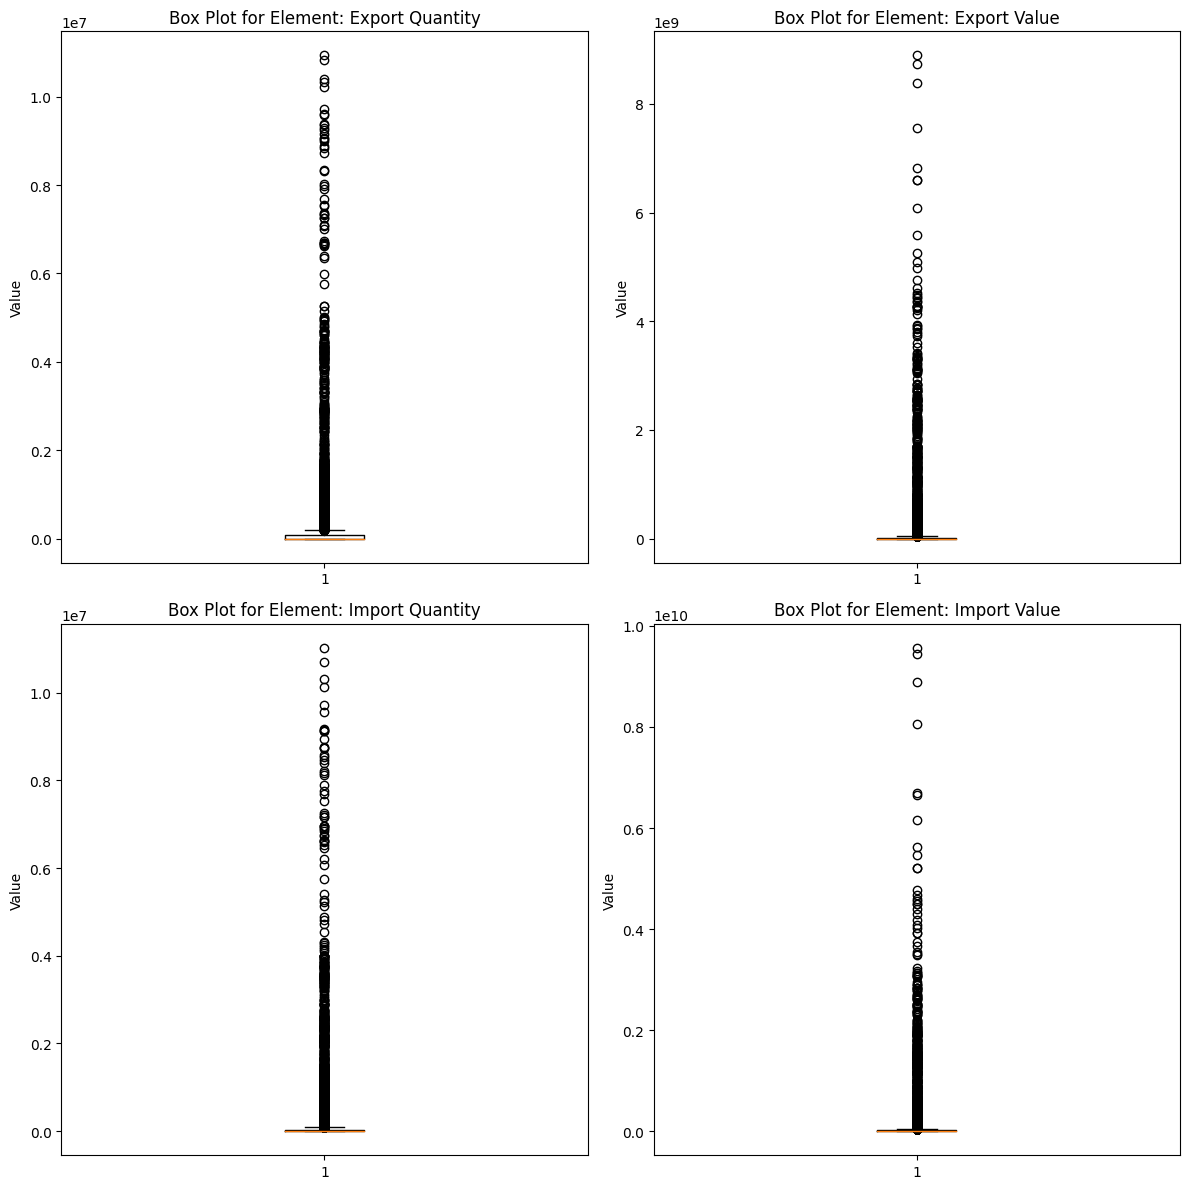

In [ ]:
# let us visualize the df3 version of the dataset to see its distribution and decide on outliers
import pandas as pd
import matplotlib.pyplot as plt


# Get the unique values in the 'Element' column and sort them
unique_elements = sorted(df3['Element'].unique())

# Sort the DataFrame by the 'Element' column
sorted_df = df3.sort_values(by='Element')

# Create a figure and axes for the box plots
num_plots = len(unique_elements)
num_cols = 2  # You can adjust the number of columns as needed
num_rows = -(-num_plots // num_cols)  # Ceiling division
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))

# Flatten the axes array if needed
axes = axes.flatten()

# Iterate through unique elements and create box plots
for index, element in enumerate(unique_elements):
    subset = sorted_df[sorted_df['Element'] == element]
    ax = axes[index]
    ax.boxplot(subset['Value'])
    ax.set_title(f'Box Plot for Element: {element}')
    ax.set_ylabel('Value')

# Hide any unused subplots
for index in range(len(unique_elements), num_rows * num_cols):
    axes[index].axis('off')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.10/dist-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start


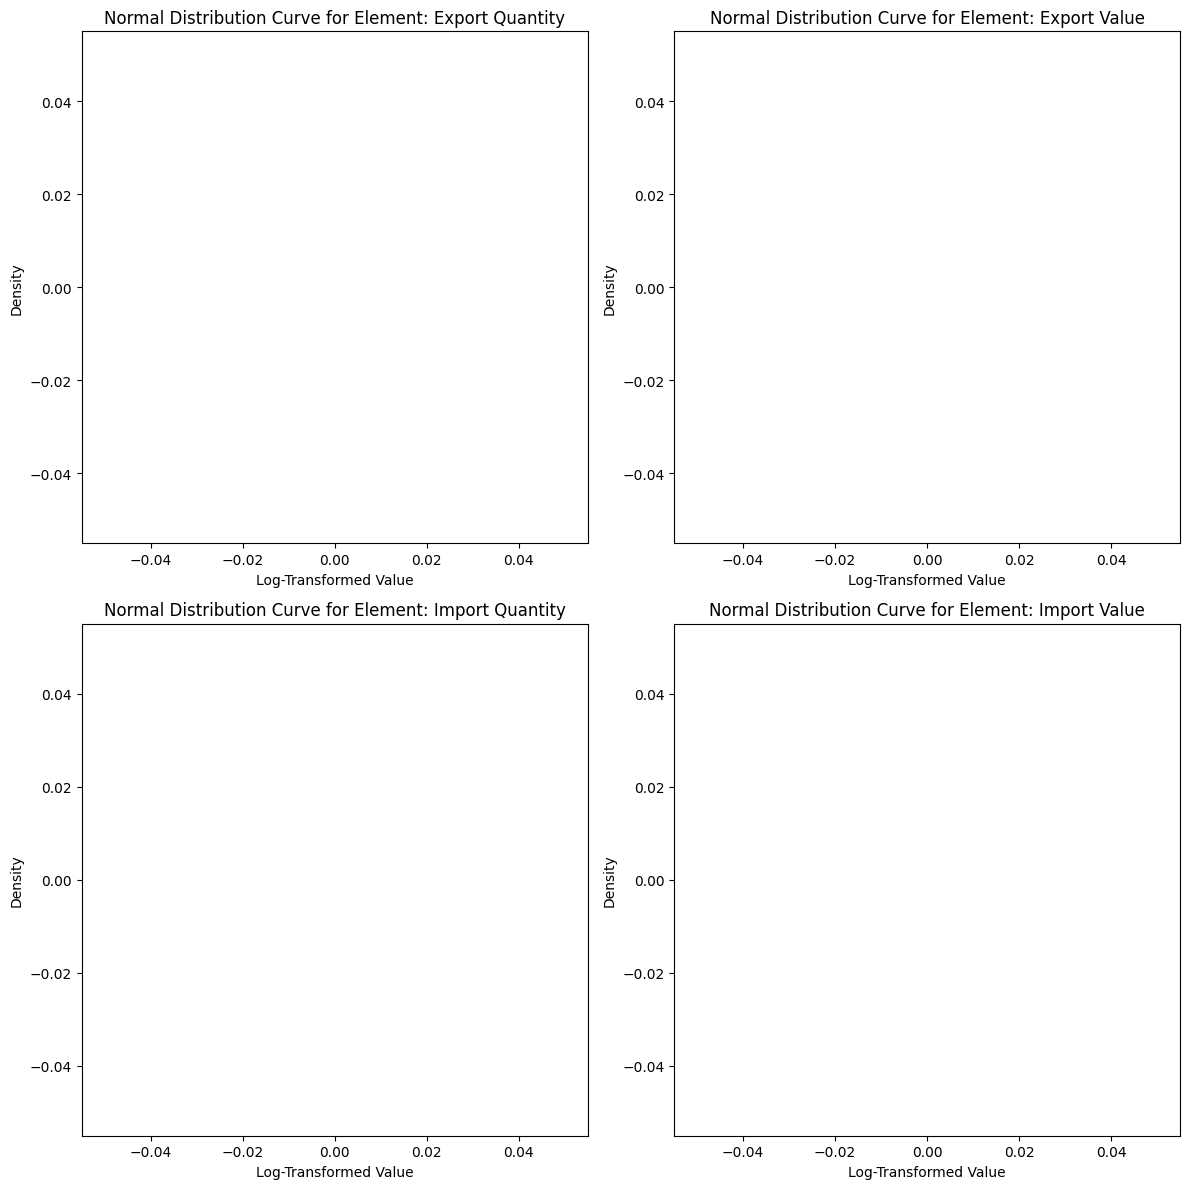

In [ ]:
# let us do normal distribution curves using this df3 version of the original dataset where missing values were replaced by median values

# As the data is poor in quality, and not yet edited, we don't see the normal curves below


import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm


# Sort the DataFrame by 'Element' and 'Value'
sorted_df3 = df3.sort_values(by=['Element', 'Value'])

# Get the unique values in the 'Element' column and sort them
unique_elements = sorted(sorted_df3['Element'].unique())

# Create a figure and axes for the normal distribution curves
num_plots = len(unique_elements)
num_cols = 2  # You can adjust the number of columns as needed
num_rows = -(-num_plots // num_cols)  # Ceiling division
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))

# Flatten the axes array if needed
axes = axes.flatten()

# Iterate through unique elements, log transform, and create normal distribution curves
for index, element in enumerate(unique_elements):
    subset = sorted_df3[sorted_df3['Element'] == element]

    # Log transform the 'Value' column
    log_transformed_values = np.log(subset['Value'])

    mean_value = log_transformed_values.mean()
    std_dev_value = log_transformed_values.std()

    x = np.linspace(log_transformed_values.min(), log_transformed_values.max(), 1000)
    y = norm.pdf(x, mean_value, std_dev_value)

    ax = axes[index]
    ax.plot(x, y)
    ax.set_title(f'Normal Distribution Curve for Element: {element}')
    ax.set_xlabel('Log-Transformed Value')
    ax.set_ylabel('Density')

# Hide any unused subplots
for index in range(len(unique_elements), num_rows * num_cols):
    axes[index].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# let us sort the df3 dataset by 'Element' then by 'Value' and further inspect the data, 'Value' column
import pandas as pd

# Get the unique values in the 'Element' column and sort them
unique_elements = sorted(df3['Element'].unique())

# Create an empty list to store sorted DataFrames for each element
sorted_dfs = []

# Iterate through unique elements and sort within each group by 'Value'
for element in unique_elements:
    subset = df3[df3['Element'] == element]
    sorted_subset = subset.sort_values(by='Value')
    sorted_dfs.append(sorted_subset)

# Concatenate the sorted DataFrames back together
sorted_df3 = pd.concat(sorted_dfs)

# Display the sorted DataFrame
print(sorted_df3.head())


           Country          Element  Year  Value
307108  Mozambique  Export Quantity  1963    0.0
116220     Comoros  Export Quantity  2006    0.0
116221     Comoros  Export Quantity  2007    0.0
116222     Comoros  Export Quantity  2008    0.0
116227     Comoros  Export Quantity  2013    0.0


In [ ]:
sorted_df3.tail()

,Country,Element,Year,Value
527781,World,Import Value,2008,6.692935e+09
527783,World,Import Value,2010,8.059080e+09
527784,World,Import Value,2011,8.881529e+09
527786,World,Import Value,2013,9.445090e+09
527785,World,Import Value,2012,9.563950e+09


In [ ]:
sorted_df3.shape

(42800, 4)

In [ ]:
# Let us count the number of rows in the sorted_df3 dataset where 'Value' = 0
# Even after replacing the missing values by the median, we can see below that there are a total of 9955 Zero values

import pandas as pd

# Assuming df2 is your DataFrame
# Read your dataset into a DataFrame if not already done
# df2 = pd.read_csv("your_dataset.csv")

# Sort the DataFrame by 'Element' and 'Value'
sorted_df2 = df2.sort_values(by=['Element', 'Value'])

# Count the number of rows where 'Value' = 0
count_value_zero = (sorted_df2['Value'] == 0).sum()

# Display the count
print("Number of rows where 'Value' = 0:", count_value_zero)


Number of rows where 'Value' = 0: 9955


In [ ]:
# Let us classify those 0 values by 'Element' then by 'Value'
import pandas as pd

# Assuming df2 is your DataFrame
# Read your dataset into a DataFrame if not already done
# df2 = pd.read_csv("your_dataset.csv")

# Sort the DataFrame by 'Element' and 'Value'
sorted_df3 = sorted_df3.sort_values(by=['Element', 'Value'])

# Find rows where 'Value' = 0
value_zero_rows = sorted_df3[sorted_df3['Value'] == 0]

# Group and count by unique values in 'Element' column
count_by_element = value_zero_rows.groupby('Element').size()

# Display the count by unique values in 'Element' column
print("Count of rows where 'Value' = 0, classified by 'Element':")
print(count_by_element)


Count of rows where 'Value' = 0, classified by 'Element':
Element
Export Quantity    2807
Export Value       2948
Import Quantity    2106
Import Value       2094
dtype: int64


In [ ]:
# So, to work with meaningful data, let us set a cutoff value of  'Value' > 10000 (a meaningful cutoff in livestock trade), for import and export quntities in
# Let us save df3 as df4 after filtered by 'Value' > 10000
# The analysis showed that there are a total of 23257 rows of data where 'Value' > 10000

import pandas as pd

# Sort the DataFrame by 'Element' and 'Value'
sorted_df3 = df3.sort_values(by=['Element', 'Value'])

# Filter rows where 'Value' is greater than 10000
df4= sorted_df3[sorted_df3['Value'] > 10000]

# Count the number of rows
num_rows = len(filtered_rows)

# Display the count
print(f"Number of rows where 'Value' > 10000: {num_rows}")


Number of rows where 'Value' > 10000: 23257


In [ ]:
 df4.shape

(23257, 4)

In [ ]:
df4.head()

,Country,Element,Year,Value
379384,Republic of Moldova,Export Quantity,2011,10014.0
79559,Cambodia,Export Quantity,1968,10017.0
544143,Northern Africa,Export Quantity,1993,10020.0
483306,United Kingdom,Export Quantity,2008,10032.0
445826,Switzerland,Export Quantity,1973,10035.0


In [ ]:
df4.tail()

,Country,Element,Year,Value
527781,World,Import Value,2008,6.692935e+09
527783,World,Import Value,2010,8.059080e+09
527784,World,Import Value,2011,8.881529e+09
527786,World,Import Value,2013,9.445090e+09
527785,World,Import Value,2012,9.563950e+09


In [ ]:
# Now, we have relatively better data for further analysis
df4.describe()

,Year,Value
count,23257.000000,2.325700e+04
mean,1987.837425,8.049159e+07
std,15.418693,3.951303e+08
min,1961.000000,1.001300e+04
25%,1974.000000,1.312950e+05
50%,1989.000000,8.530000e+05
75%,2001.000000,1.127600e+07
max,2013.000000,9.563950e+09


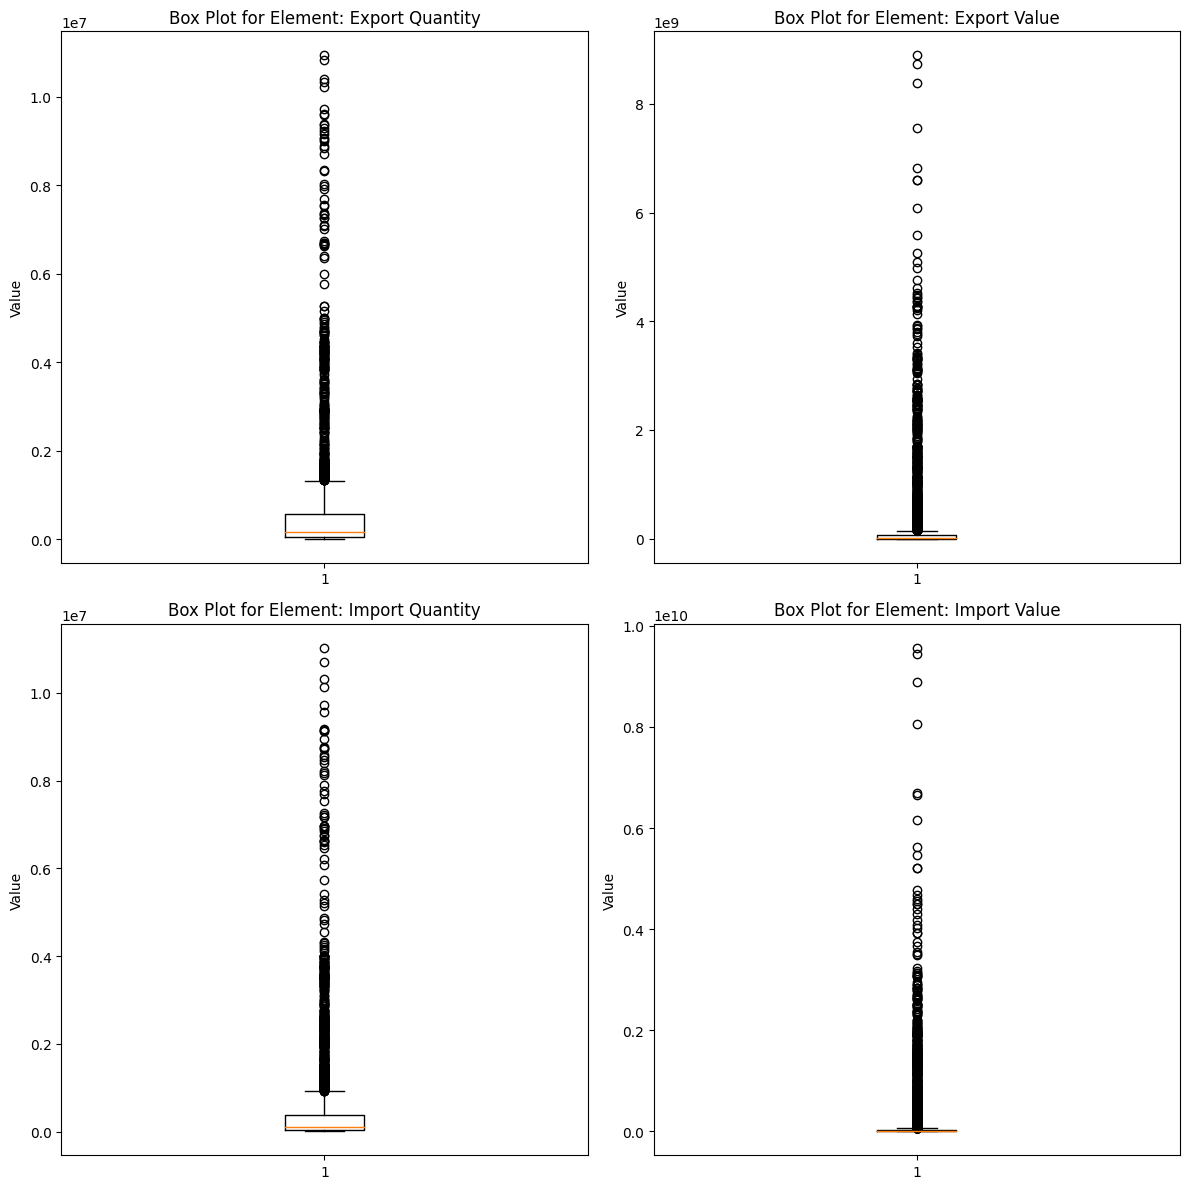

In [ ]:
# let us visualize this df4 dataset (N.B, this is the version of the original dataset after it was corrected for missing values, zero values, cutoff value)
import pandas as pd
import matplotlib.pyplot as plt


# Get the unique values in the 'Element' column and sort them
unique_elements = sorted(df4['Element'].unique())

# Sort the DataFrame by the 'Element' column
sorted_df = df4.sort_values(by='Element')

# Create a figure and axes for the box plots
num_plots = len(unique_elements)
num_cols = 2  # You can adjust the number of columns as needed
num_rows = -(-num_plots // num_cols)  # Ceiling division
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))

# Flatten the axes array if needed
axes = axes.flatten()

# Iterate through unique elements and create box plots
for index, element in enumerate(unique_elements):
    subset = sorted_df[sorted_df['Element'] == element]
    ax = axes[index]
    ax.boxplot(subset['Value'])
    ax.set_title(f'Box Plot for Element: {element}')
    ax.set_ylabel('Value')

# Hide any unused subplots
for index in range(len(unique_elements), num_rows * num_cols):
    axes[index].axis('off')

plt.tight_layout()
plt.show()

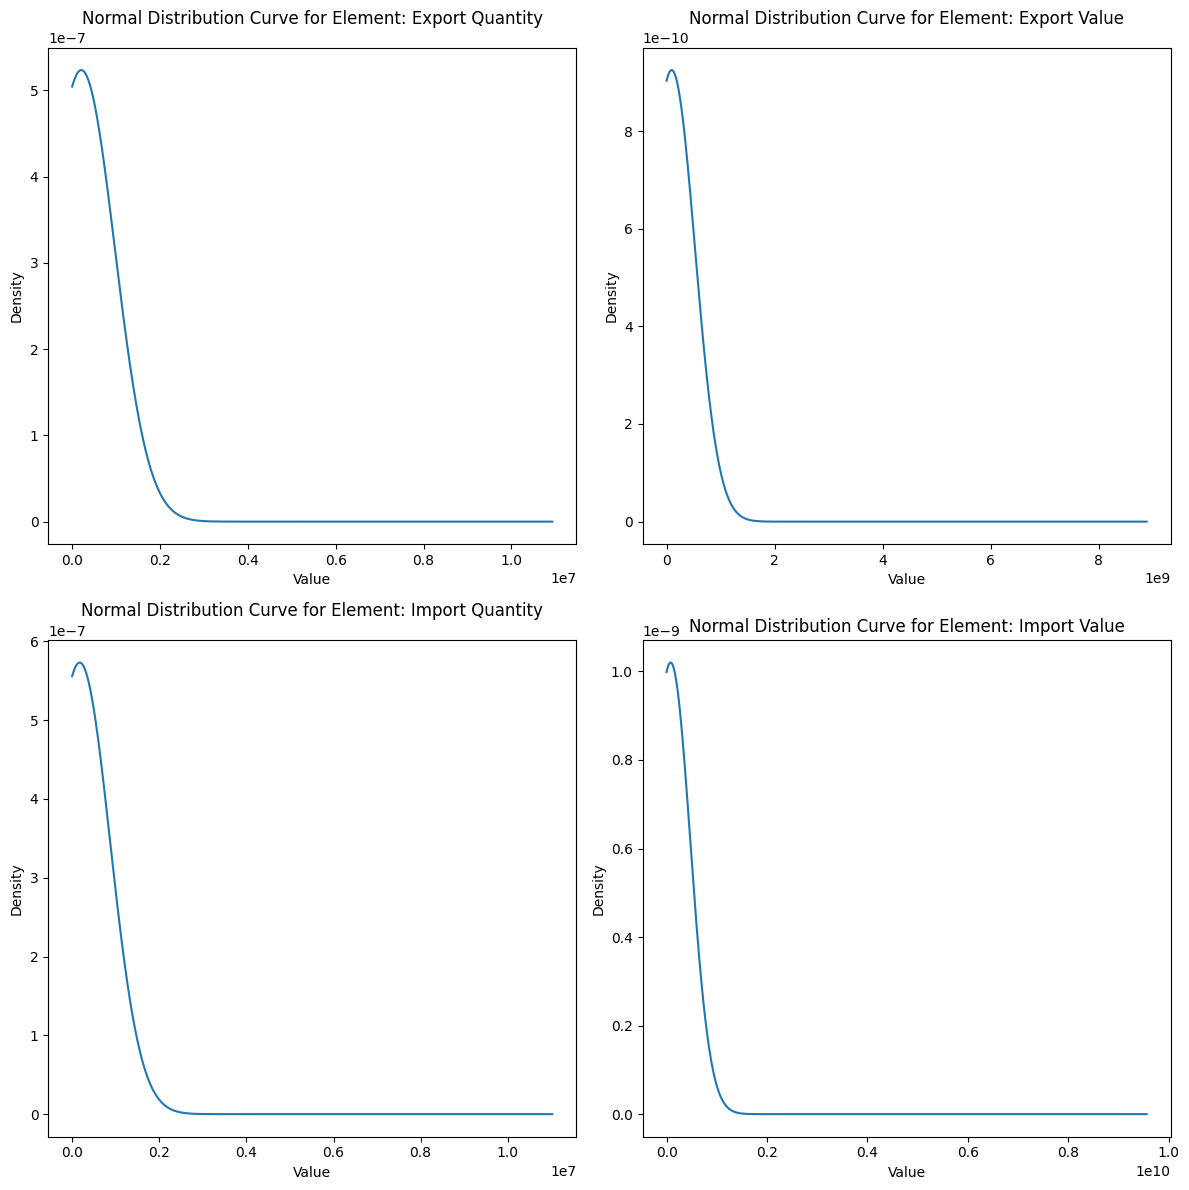

In [ ]:
#The normal distribution view of the df3 version of the dataset (messing value replaced by median, but no log transformation was made)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm


# Get the unique values in the 'Element' column and sort them
unique_elements = sorted(df3['Element'].unique())

# Sort the DataFrame by the 'Element' column
sorted_df = df3.sort_values(by=['Element', 'Value'])

# Create a figure and axes for the normal distribution curves
num_plots = len(unique_elements)
num_cols = 2  # You can adjust the number of columns as needed
num_rows = -(-num_plots // num_cols)  # Ceiling division
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))

# Flatten the axes array if needed
axes = axes.flatten()

# Iterate through unique elements and create normal distribution curves
for index, element in enumerate(unique_elements):
    subset = sorted_df[sorted_df['Element'] == element]

    mean_value = subset['Value'].mean()
    std_dev_value = subset['Value'].std()

    x = np.linspace(subset['Value'].min(), subset['Value'].max(), 1000)
    y = norm.pdf(x, mean_value, std_dev_value)

    ax = axes[index]
    ax.plot(x, y)
    ax.set_title(f'Normal Distribution Curve for Element: {element}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')

# Hide any unused subplots
for index in range(len(unique_elements), num_rows * num_cols):
    axes[index].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
within_3_std_dev.shape

(11045, 4)

In [ ]:
 df5 = within_3_std_dev.copy()

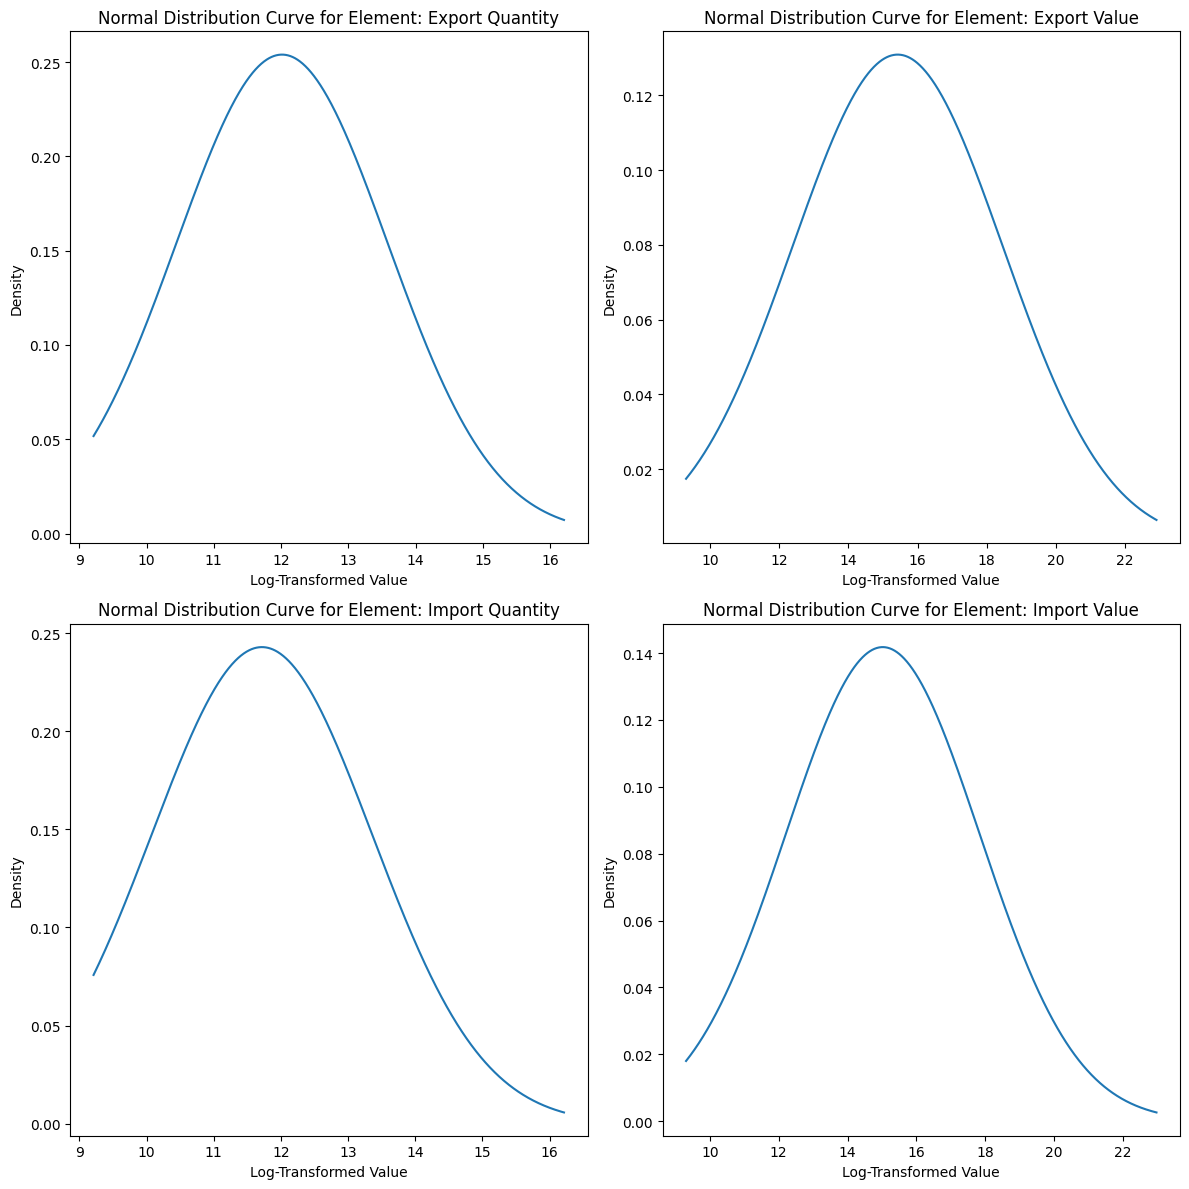

In [ ]:
# Let us make normal distribution curves, after log transformation of the 'Value' column in the df4 version of the dataset
# Although the test didn't confirm normal distribution, as we can see below, we have relatively better curves with df4 version of the dataset.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Assuming df2 is your DataFrame
# Read your dataset into a DataFrame if not already done
# df2 = pd.read_csv("your_dataset.csv")

# Sort the DataFrame by 'Element' and 'Value'
sorted_df2 = df4.sort_values(by=['Element', 'Value'])

# Get the unique values in the 'Element' column and sort them
unique_elements = sorted(sorted_df2['Element'].unique())

# Create a figure and axes for the normal distribution curves
num_plots = len(unique_elements)
num_cols = 2  # You can adjust the number of columns as needed
num_rows = -(-num_plots // num_cols)  # Ceiling division
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))

# Flatten the axes array if needed
axes = axes.flatten()

# Iterate through unique elements, log transform, and create normal distribution curves
for index, element in enumerate(unique_elements):
    subset = sorted_df2[sorted_df2['Element'] == element]

    # Log transform the 'Value' column
    log_transformed_values = np.log(subset['Value'])

    mean_value = log_transformed_values.mean()
    std_dev_value = log_transformed_values.std()

    x = np.linspace(log_transformed_values.min(), log_transformed_values.max(), 1000)
    y = norm.pdf(x, mean_value, std_dev_value)

    ax = axes[index]
    ax.plot(x, y)
    ax.set_title(f'Normal Distribution Curve for Element: {element}')
    ax.set_xlabel('Log-Transformed Value')
    ax.set_ylabel('Density')

# Hide any unused subplots
for index in range(len(unique_elements), num_rows * num_cols):
    axes[index].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
df4.shape

(23257, 4)

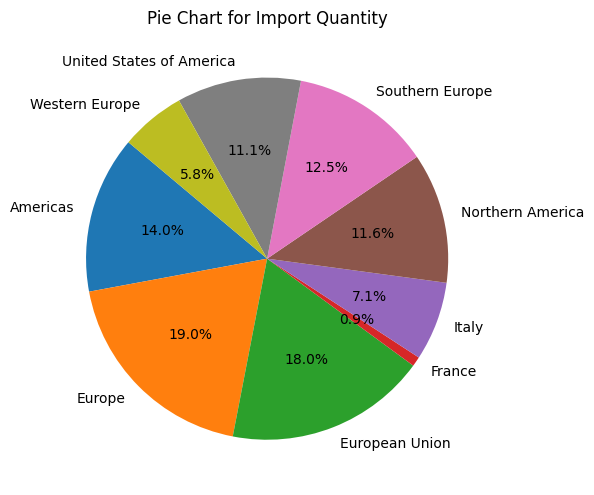

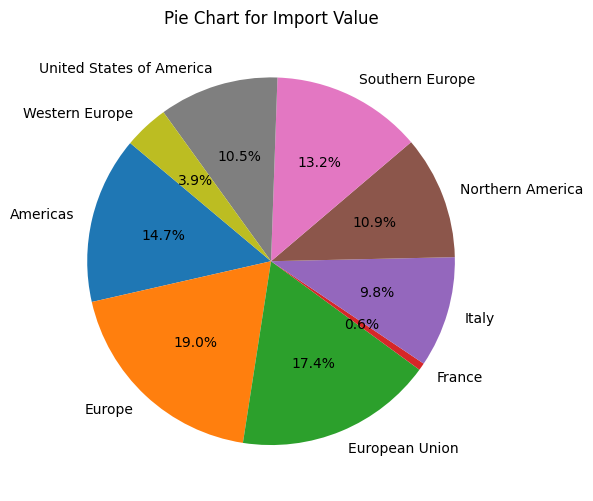

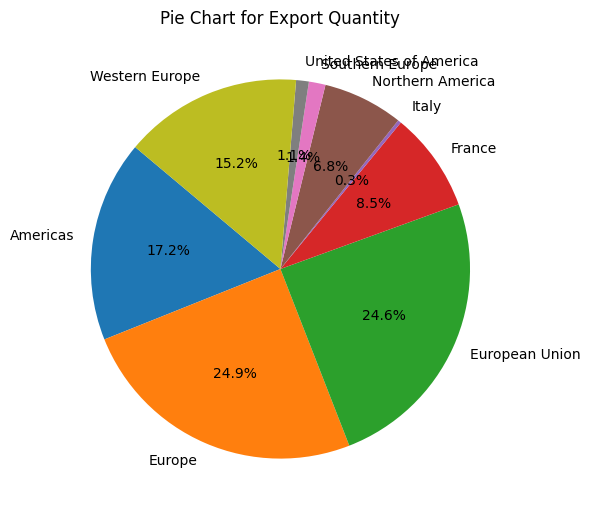

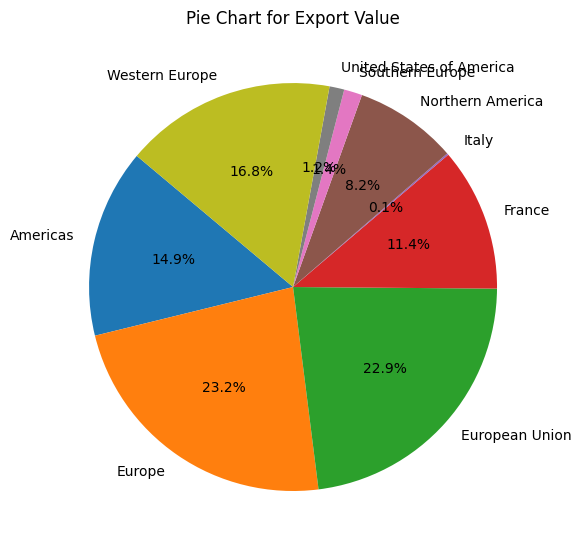

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df2 is your DataFrame
# Read your dataset into a DataFrame if not already done
# df2 = pd.read_csv("your_dataset.csv")

# Sort the DataFrame by 'Element'
sorted_df = df4.sort_values(by='Element')

# Get the unique values in the 'Element' column and sort them
unique_elements = sorted(sorted_df['Element'].unique())

# Filter the DataFrame for the last ten years
last_ten_years = sorted_df[sorted_df['Year'] >= sorted_df['Year'].max() - 14]

# Get the top 10 countries based on the mean 'Value' over the last ten years
top_countries = last_ten_years.groupby('Country')['Value'].mean().sort_values(ascending=False).head(10).index

# Exclude 'World' from the top countries
top_countries = top_countries[top_countries != 'World']

# Create four pie charts for import and export quantities/values
for element in ['Import Quantity', 'Import Value', 'Export Quantity', 'Export Value']:
    plt.figure(figsize=(6, 6))
    plt.title(f'Pie Chart for {element}')

    subset = last_ten_years[(last_ten_years['Element'] == element) & (last_ten_years['Country'].isin(top_countries))]
    values = subset.groupby('Country')['Value'].sum()

    plt.pie(values, labels=values.index, autopct='%1.1f%%', startangle=140)
    plt.tight_layout()
    plt.show()


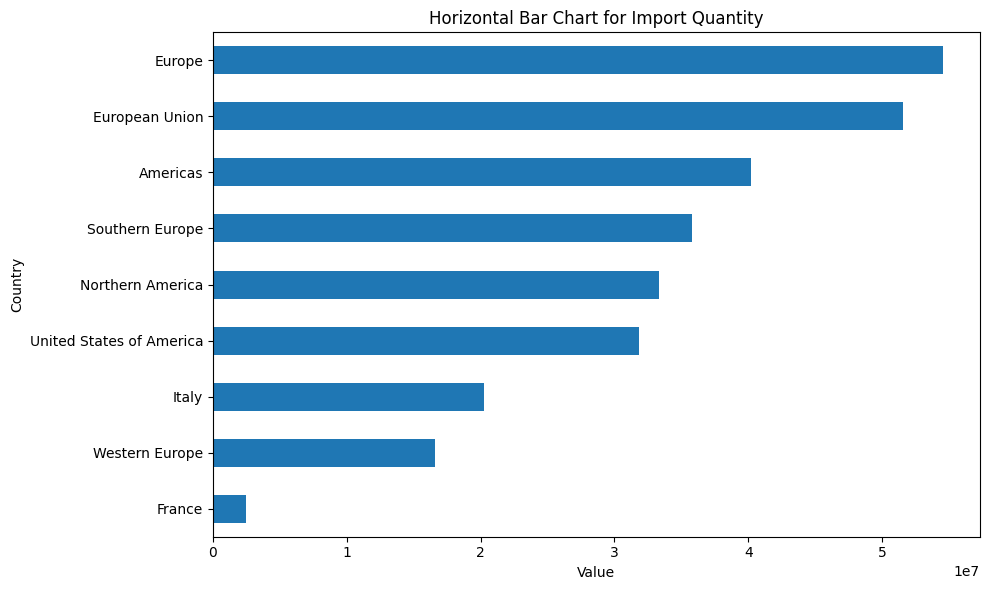

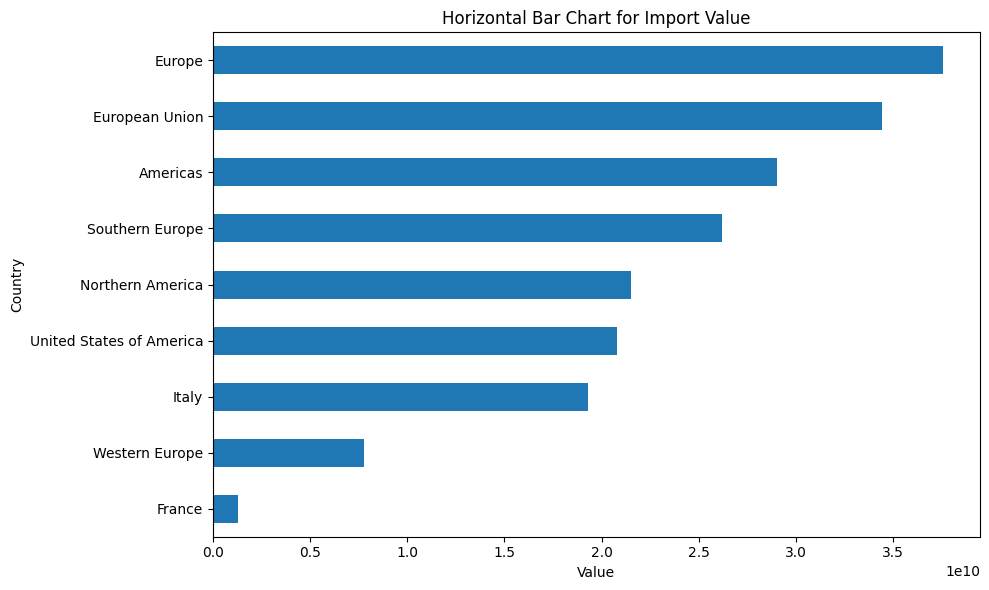

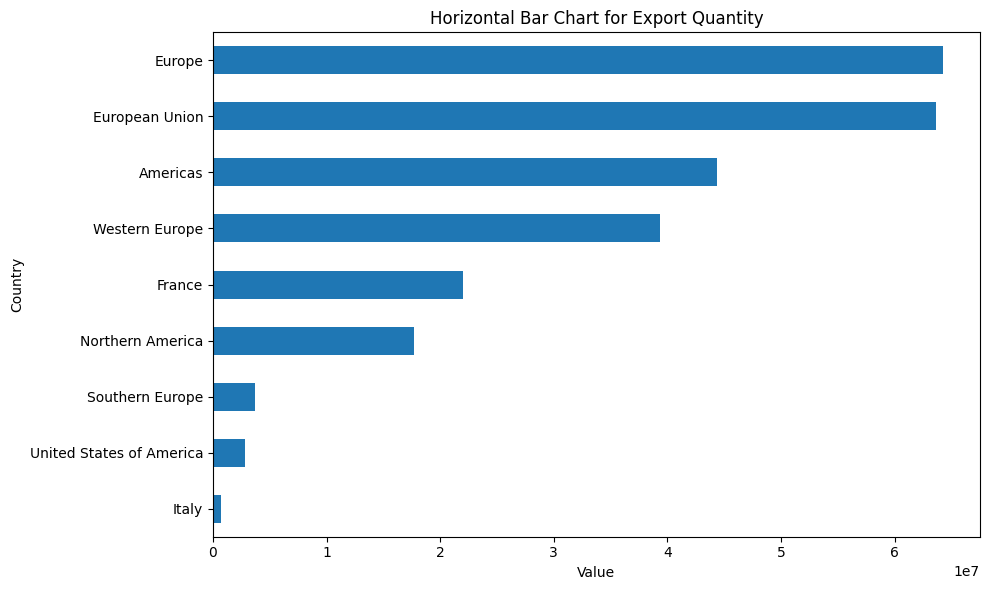

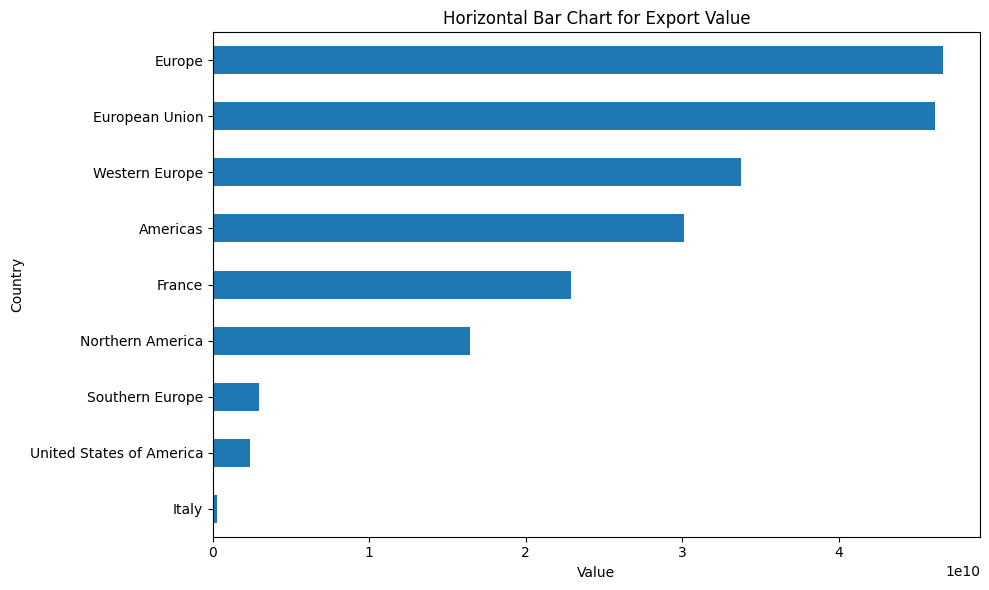

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df2 is your DataFrame
# Read your dataset into a DataFrame if not already done
# df2 = pd.read_csv("your_dataset.csv")

# Sort the DataFrame by 'Element'
sorted_df = df4.sort_values(by='Element')

# Get the unique values in the 'Element' column and sort them
unique_elements = sorted(sorted_df['Element'].unique())

# Filter the DataFrame for the last ten years
last_ten_years = sorted_df[sorted_df['Year'] >= sorted_df['Year'].max() - 14]

# Get the top 10 countries based on the mean 'Value' over the last ten years
top_countries = last_ten_years.groupby('Country')['Value'].mean().sort_values(ascending=False).head(10).index

# Exclude 'World' from the top countries
top_countries = top_countries[top_countries != 'World']

# Create four horizontal bar charts for import and export quantities/values
for element in ['Import Quantity', 'Import Value', 'Export Quantity', 'Export Value']:
    plt.figure(figsize=(10, 6))
    plt.title(f'Horizontal Bar Chart for {element}')

    subset = last_ten_years[(last_ten_years['Element'] == element) & (last_ten_years['Country'].isin(top_countries))]
    values = subset.groupby('Country')['Value'].sum()

    values_sorted = values.sort_values(ascending=True)  # Sort values in ascending order

    values_sorted.plot(kind='barh')
    plt.xlabel('Value')
    plt.ylabel('Country')
    plt.tight_layout()
    plt.show()


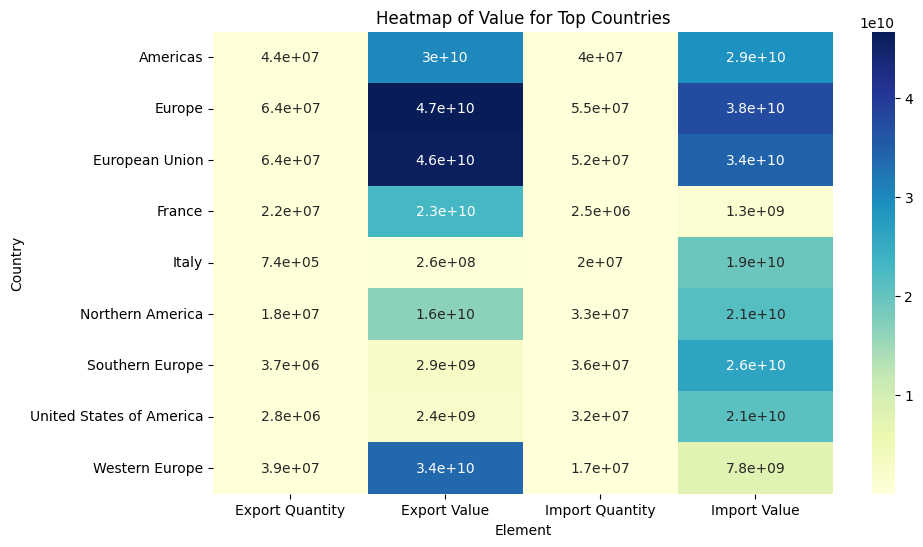

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df2 is your DataFrame
# Read your dataset into a DataFrame if not already done
# df2 = pd.read_csv("your_dataset.csv")

# Sort the DataFrame by 'Element'
sorted_df = df4.sort_values(by='Element')

# Filter the DataFrame for the last ten years
last_ten_years = sorted_df[sorted_df['Year'] >= sorted_df['Year'].max() - 14]

# Get the top 10 countries based on the mean 'Value' over the last ten years
top_countries = last_ten_years.groupby('Country')['Value'].mean().sort_values(ascending=False).head(10).index

# Exclude 'World' from the top countries
top_countries = top_countries[top_countries != 'World']

# Select the desired elements for the heatmap
heatmap_elements = ['Import Quantity', 'Import Value', 'Export Quantity', 'Export Value']

# Filter the DataFrame to include only the desired elements and countries
subset = last_ten_years[(last_ten_years['Element'].isin(heatmap_elements)) & (last_ten_years['Country'].isin(top_countries))]

# Pivot the data to create a heatmap
heatmap_data = subset.pivot_table(index='Country', columns='Element', values='Value', aggfunc='sum')

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Value for Top Countries')
plt.xlabel('Element')
plt.ylabel('Country')
plt.show()


In [ ]:
import pandas as pd

# Assuming df2 is your DataFrame
# Read your dataset into a DataFrame if not already done
# df2 = pd.read_csv("your_dataset.csv")

# Sort the DataFrame by 'Element'
sorted_df = df4.sort_values(by='Element')

# Filter the DataFrame for the last ten years
last_ten_years = sorted_df[sorted_df['Year'] >= sorted_df['Year'].max() - 14]

# Get the top 10 countries based on the mean 'Value' over the last ten years
top_countries = last_ten_years.groupby('Country')['Value'].mean().sort_values(ascending=False).head(10).index

# Exclude 'World' from the top countries
top_countries = top_countries[top_countries != 'World']

# Select the desired elements for the summary table
summary_elements = ['Import Quantity', 'Import Value', 'Export Quantity', 'Export Value']

# Filter the DataFrame to include only the desired elements and countries
subset = last_ten_years[(last_ten_years['Element'].isin(summary_elements)) & (last_ten_years['Country'].isin(top_countries))]

# Pivot the data to create a summary table with mean and std
summary_table = subset.pivot_table(index='Country', columns='Element', values='Value', aggfunc=['mean', 'std'])

# Display the summary table
print(summary_table)


                                    mean                                \
Element                  Export Quantity  Export Value Import Quantity   
Country                                                                  
Americas                    2.960328e+06  2.009229e+09    2.681175e+06   
Europe                      4.286500e+06  3.112821e+09    3.638644e+06   
European Union              4.245491e+06  3.075344e+09    3.436248e+06   
France                      1.467265e+06  1.526682e+09    1.654318e+05   
Italy                       4.941000e+04  1.735280e+07    1.349369e+06   
Northern America            1.180133e+06  1.095902e+09    2.223246e+06   
Southern Europe             2.442777e+05  1.943882e+08    2.388540e+06   
United States of America    1.869422e+05  1.574003e+08    2.119731e+06   
Western Europe              2.622136e+06  2.252210e+09    1.107168e+06   

                                                   std                \
Element                   Import Value 

In [ ]:
import pandas as pd

# Assuming df2 is your DataFrame
# Read your dataset into a DataFrame if not already done
# df2 = pd.read_csv("your_dataset.csv")

# Sort the DataFrame by 'Element'
sorted_df = df4.sort_values(by='Element')

# Filter the DataFrame for the last ten years
last_ten_years = sorted_df[sorted_df['Year'] >= sorted_df['Year'].max() - 14]

# Get the top 10 countries based on the mean 'Value' over the last ten years
top_countries = last_ten_years.groupby('Country')['Value'].mean().sort_values(ascending=False).head(10).index

# Exclude 'World' from the top countries
top_countries = top_countries[top_countries != 'World']

# Select the desired elements for the summary table
summary_elements = ['Import Quantity', 'Import Value', 'Export Quantity', 'Export Value']

# Filter the DataFrame to include only the desired elements and countries
subset = last_ten_years[(last_ten_years['Element'].isin(summary_elements)) & (last_ten_years['Country'].isin(top_countries))]

# Pivot the data to create a summary table with mean and std
summary_table = subset.pivot_table(index='Country', columns='Element', values='Value', aggfunc=['mean', 'std'])

# Rename columns using acronyms
summary_table.columns = ['_'.join(col).strip() for col in summary_table.columns.values]

# Format the mean and std columns to display up to 4 decimals
summary_table = summary_table.round(4)

# Display the summary table
print(summary_table)


                          mean_Export Quantity  mean_Export Value  \
Country                                                             
Americas                          2.960328e+06       2.009229e+09   
Europe                            4.286500e+06       3.112821e+09   
European Union                    4.245491e+06       3.075344e+09   
France                            1.467265e+06       1.526682e+09   
Italy                             4.941000e+04       1.735280e+07   
Northern America                  1.180133e+06       1.095902e+09   
Southern Europe                   2.442777e+05       1.943882e+08   
United States of America          1.869422e+05       1.574003e+08   
Western Europe                    2.622136e+06       2.252210e+09   

                          mean_Import Quantity  mean_Import Value  \
Country                                                             
Americas                          2.681175e+06       1.935682e+09   
Europe                           

In [ ]:
import pandas as pd

# Assuming df2 is your DataFrame
# Read your dataset into a DataFrame if not already done
# df2 = pd.read_csv("your_dataset.csv")

# Sort the DataFrame by 'Element'
sorted_df = df4.sort_values(by='Element')

# Filter the DataFrame for the last ten years
last_ten_years = sorted_df[sorted_df['Year'] >= sorted_df['Year'].max() - 14]

# Get the top 10 countries based on the mean 'Value' over the last ten years
top_countries = last_ten_years.groupby('Country')['Value'].mean().sort_values(ascending=False).head(10).index

# Exclude 'World' from the top countries
top_countries = top_countries[top_countries != 'World']

# Select the desired elements for the summary table
summary_elements = ['Import Quantity', 'Import Value', 'Export Quantity', 'Export Value']

# Filter the DataFrame to include only the desired elements and countries
subset = last_ten_years[(last_ten_years['Element'].isin(summary_elements)) & (last_ten_years['Country'].isin(top_countries))]

# Pivot the data to create a summary table with mean and std
summary_table = subset.pivot_table(index='Country', columns='Element', values='Value', aggfunc=['mean', 'std'])

# Rename columns using acronyms
summary_table.columns = ['_'.join(col).strip() for col in summary_table.columns.values]

# Format the mean and std columns to display up to 3 decimals
summary_table = summary_table.round(3)

# Display the summary table
print(summary_table)


                          mean_Export Quantity  mean_Export Value  \
Country                                                             
Americas                           2960328.400       2.009229e+09   
Europe                             4286500.400       3.112821e+09   
European Union                     4245491.400       3.075344e+09   
France                             1467264.600       1.526682e+09   
Italy                                49410.000       1.735280e+07   
Northern America                   1180132.600       1.095902e+09   
Southern Europe                     244277.667       1.943882e+08   
United States of America            186942.200       1.574003e+08   
Western Europe                     2622135.867       2.252210e+09   

                          mean_Import Quantity  mean_Import Value  \
Country                                                             
Americas                           2681175.400       1.935682e+09   
Europe                           

In [ ]:
import pandas as pd

# Assuming df2 is your DataFrame
# Read your dataset into a DataFrame if not already done
# df2 = pd.read_csv("your_dataset.csv")

# Sort the DataFrame by 'Element'
sorted_df = df4.sort_values(by='Element')

# Filter the DataFrame for the last ten years
last_ten_years = sorted_df[sorted_df['Year'] >= sorted_df['Year'].max() - 14]

# Get the top 10 countries based on the mean 'Value' over the last ten years
top_countries = last_ten_years.groupby('Country')['Value'].mean().sort_values(ascending=False).head(10).index

# Exclude 'World' from the top countries
top_countries = top_countries[top_countries != 'World']

# Select the desired elements for the summary table
summary_elements = ['Import Quantity', 'Import Value', 'Export Quantity', 'Export Value']

# Filter the DataFrame to include only the desired elements and countries
subset = last_ten_years[(last_ten_years['Element'].isin(summary_elements)) & (last_ten_years['Country'].isin(top_countries))]

# Pivot the data to create a summary table with mean and std
summary_table = subset.pivot_table(index='Country', columns='Element', values='Value', aggfunc=['mean', 'std'])

# Rename columns using acronyms
summary_table.columns = ['_'.join(col).strip() for col in summary_table.columns.values]

# Calculate new attributes
summary_table['exp_value_per_head'] = summary_table['mean_Export Value'] / summary_table['mean_Export Quantity']
summary_table['imp_value_per_head'] = summary_table['mean_Import Value'] / summary_table['mean_Import Quantity']

# Round the table to 3 decimal places
summary_table = summary_table.round(3)

# Display the summary table
print(summary_table)


                          mean_Export Quantity  mean_Export Value  \
Country                                                             
Americas                           2960328.400       2.009229e+09   
Europe                             4286500.400       3.112821e+09   
European Union                     4245491.400       3.075344e+09   
France                             1467264.600       1.526682e+09   
Italy                                49410.000       1.735280e+07   
Northern America                   1180132.600       1.095902e+09   
Southern Europe                     244277.667       1.943882e+08   
United States of America            186942.200       1.574003e+08   
Western Europe                     2622135.867       2.252210e+09   

                          mean_Import Quantity  mean_Import Value  \
Country                                                             
Americas                           2681175.400       1.935682e+09   
Europe                           

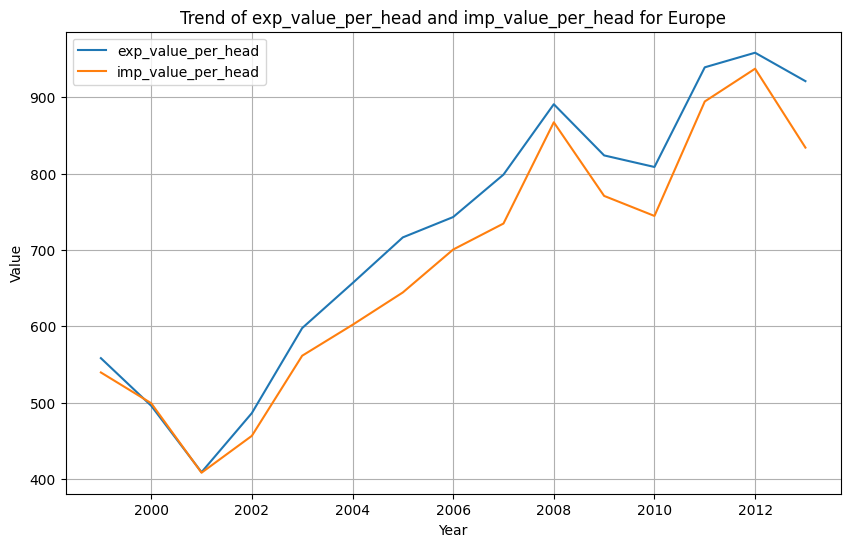

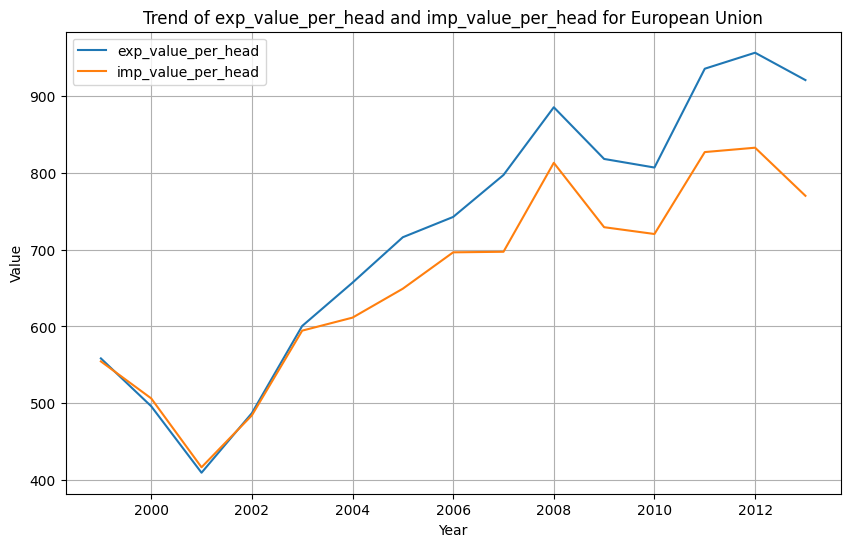

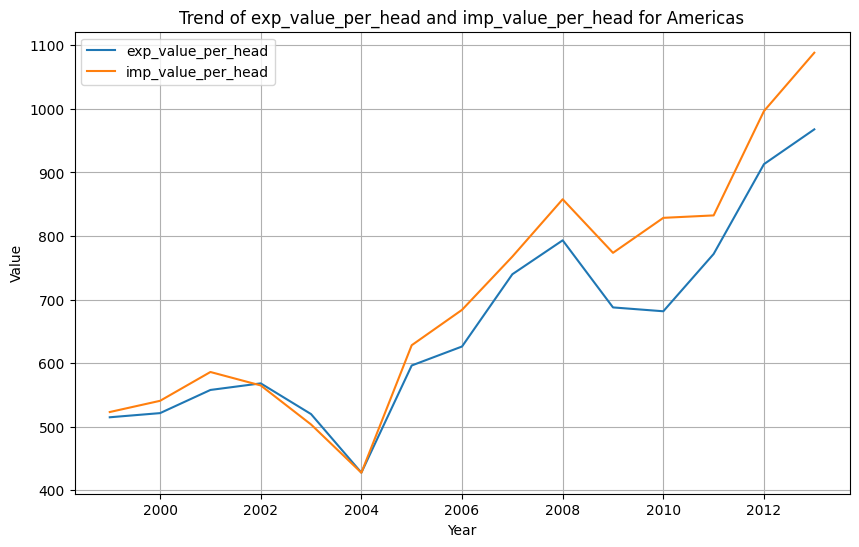

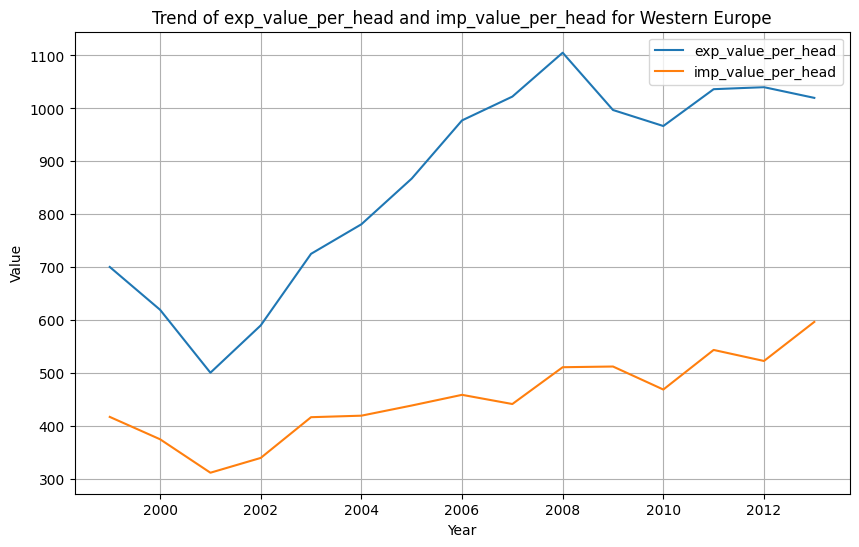

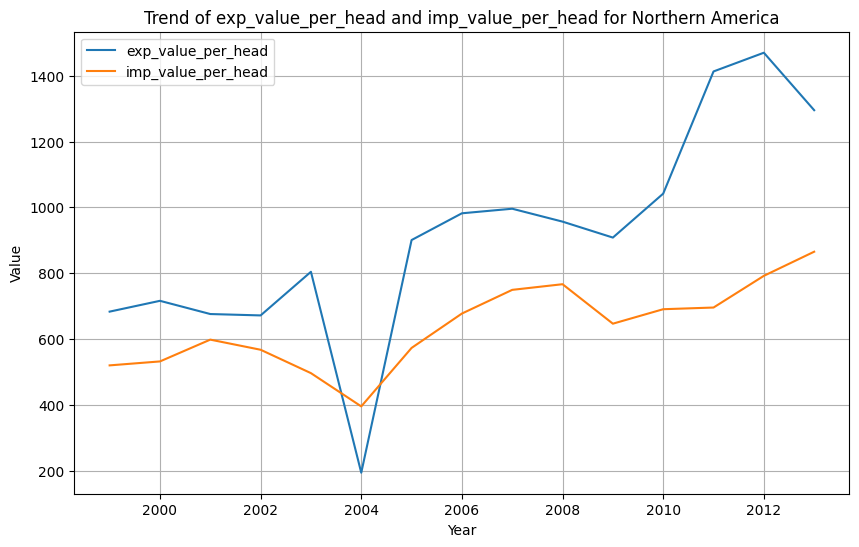

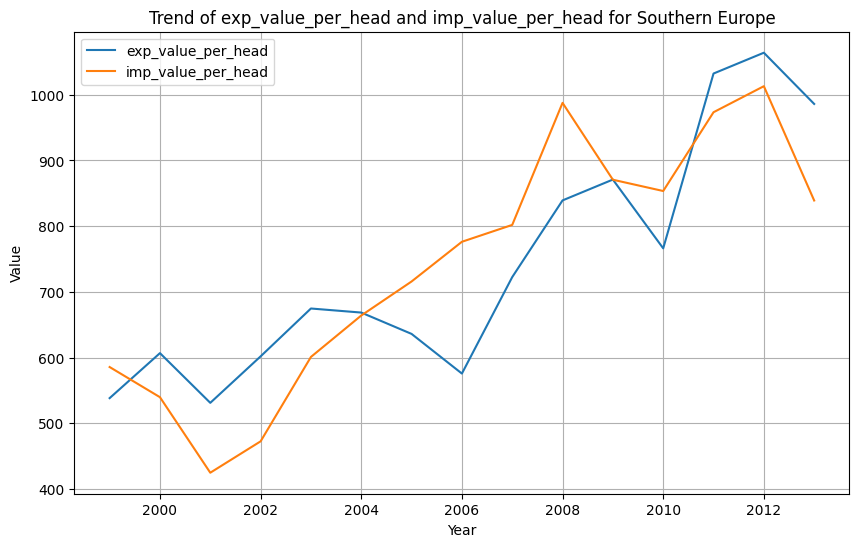

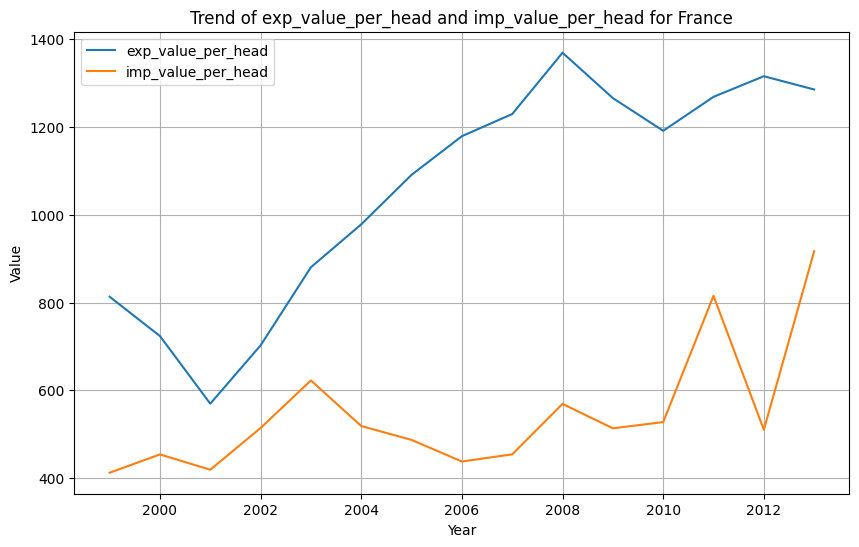

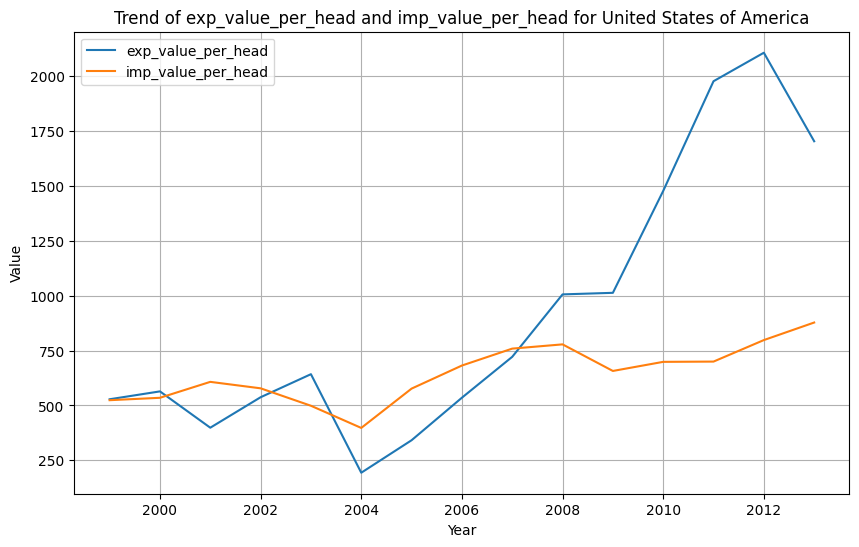

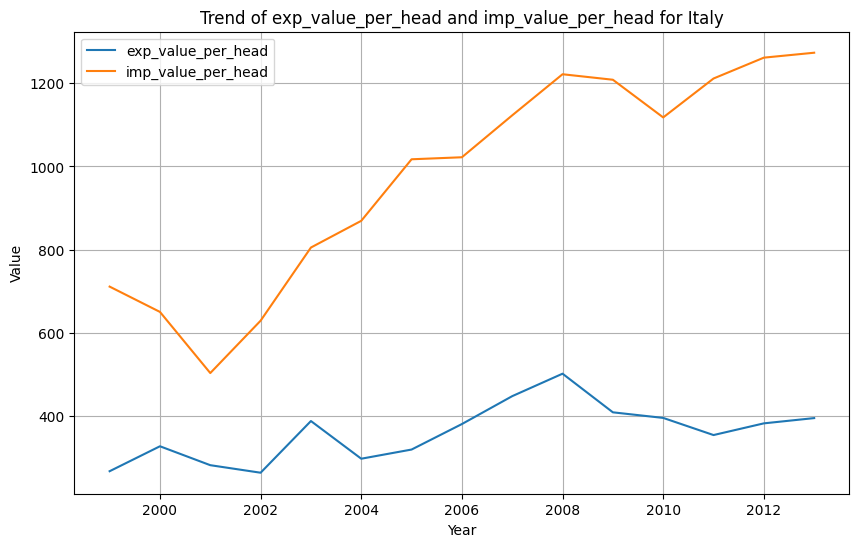

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df2 is your DataFrame
# Read your dataset into a DataFrame if not already done
# df2 = pd.read_csv("your_dataset.csv")

# Sort the DataFrame by 'Element'
sorted_df = df4.sort_values(by='Element')

# Filter the DataFrame for the last ten years
last_ten_years = sorted_df[sorted_df['Year'] >= sorted_df['Year'].max() - 14]

# Get the top 10 countries based on the mean 'Value' over the last ten years
top_countries = last_ten_years.groupby('Country')['Value'].mean().sort_values(ascending=False).head(10).index

# Exclude 'World' from the top countries
top_countries = top_countries[top_countries != 'World']

# Filter the DataFrame to include only the desired elements and countries
subset = last_ten_years[(last_ten_years['Element'].isin(['Import Quantity', 'Import Value', 'Export Quantity', 'Export Value'])) & (last_ten_years['Country'].isin(top_countries))]

# Pivot the data to create a summary table with mean and std
summary_table = subset.pivot_table(index=['Country', 'Year'], columns='Element', values='Value', aggfunc=['mean'])

# Calculate new attributes
summary_table['exp_value_per_head'] = summary_table['mean', 'Export Value'] / summary_table['mean', 'Export Quantity']
summary_table['imp_value_per_head'] = summary_table['mean', 'Import Value'] / summary_table['mean', 'Import Quantity']

# Reset index to create separate columns for Country and Year
summary_table.reset_index(inplace=True)

# Create line graphs for each attribute
for country in top_countries:
    country_data = summary_table[summary_table['Country'] == country]

    plt.figure(figsize=(10, 6))
    plt.plot(country_data['Year'], country_data['exp_value_per_head'], label='exp_value_per_head')
    plt.plot(country_data['Year'], country_data['imp_value_per_head'], label='imp_value_per_head')
    plt.title(f'Trend of exp_value_per_head and imp_value_per_head for {country}')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Assuming df2 is your DataFrame
# Read your dataset into a DataFrame if not already done
# df2 = pd.read_csv("your_dataset.csv")

# Sort the DataFrame by 'Element'
sorted_df = df4.sort_values(by='Element')

# Filter the DataFrame for the last ten years
last_ten_years = sorted_df[sorted_df['Year'] >= sorted_df['Year'].max() - 14]

# Get the top 10 countries based on the mean 'Value' over the last ten years
top_countries = last_ten_years.groupby('Country')['Value'].mean().sort_values(ascending=False).head(10).index

# Exclude 'World' from the top countries
top_countries = top_countries[top_countries != 'World']

# Filter the DataFrame to include only the desired elements and countries
subset = last_ten_years[(last_ten_years['Element'].isin(['Import Quantity', 'Import Value', 'Export Quantity', 'Export Value'])) & (last_ten_years['Country'].isin(top_countries))]

# Pivot the data to create a summary table with mean and std
summary_table = subset.pivot_table(index=['Country', 'Year'], columns='Element', values='Value', aggfunc='mean')

# Calculate new attributes
summary_table['exp_value_per_head'] = summary_table['Export Value'] / summary_table['Export Quantity']
summary_table['imp_value_per_head'] = summary_table['Import Value'] / summary_table['Import Quantity']

# Reset index to create separate columns for Country and Year
summary_table.reset_index(inplace=True)

# Prepare data for prediction
X = summary_table[summary_table['Country'].isin(top_countries)]['Year'].values.reshape(-1, 1)
y_exp = summary_table[summary_table['Country'].isin(top_countries)]['exp_value_per_head'].values
y_imp = summary_table[summary_table['Country'].isin(top_countries)]['imp_value_per_head'].values

# Encode 'Country' column using LabelEncoder
label_encoder = LabelEncoder()
X_encoded = label_encoder.fit_transform(summary_table[summary_table['Country'].isin(top_countries)]['Country'])

# Create and fit linear regression models
reg_exp = LinearRegression()
reg_exp.fit(X_encoded.reshape(-1, 1), y_exp)

reg_imp = LinearRegression()
reg_imp.fit(X_encoded.reshape(-1, 1), y_imp)

# Predict for the year 2030
pred_exp_values = reg_exp.predict([[label_encoder.transform(['France'])[0]], [label_encoder.transform(['Northern America'])[0]]])
pred_imp_values = reg_imp.predict([[label_encoder.transform(['France'])[0]], [label_encoder.transform(['Northern America'])[0]]])

print("Predicted exp_value_per_head for France and Northern America in 2030:")
print(pred_exp_values)

print("\nPredicted imp_value_per_head for France and Northern America in 2030:")
print(pred_imp_values)


Predicted exp_value_per_head for France and Northern America in 2030:
[750.70632082 794.24449944]

Predicted imp_value_per_head for France and Northern America in 2030:
[685.79337065 656.78940424]


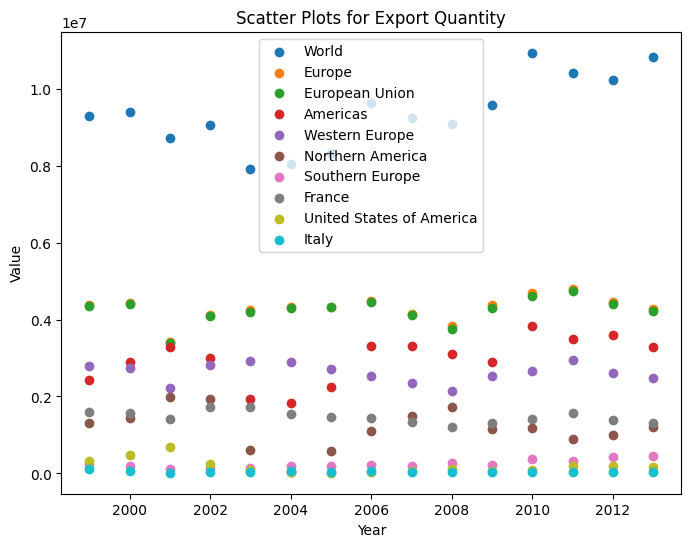

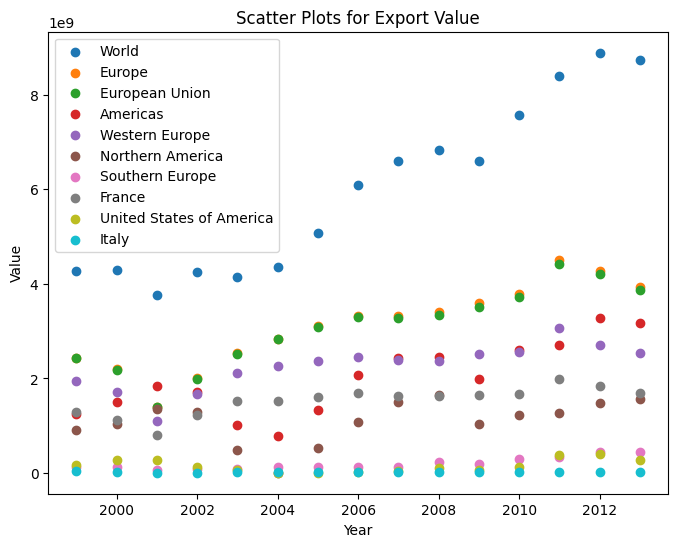

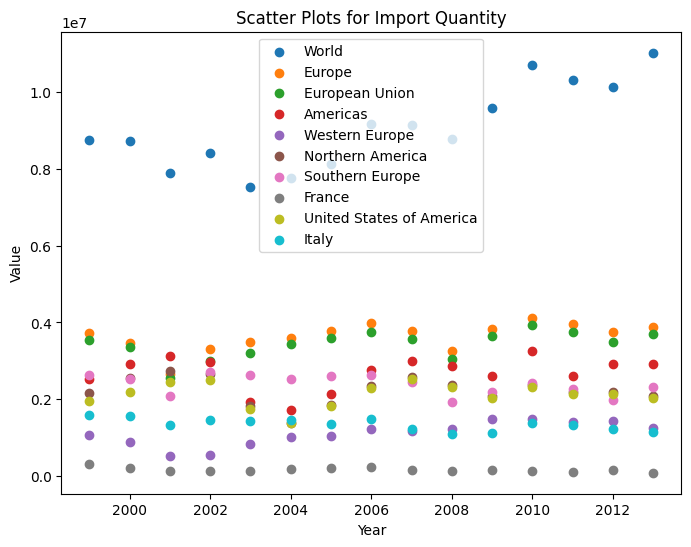

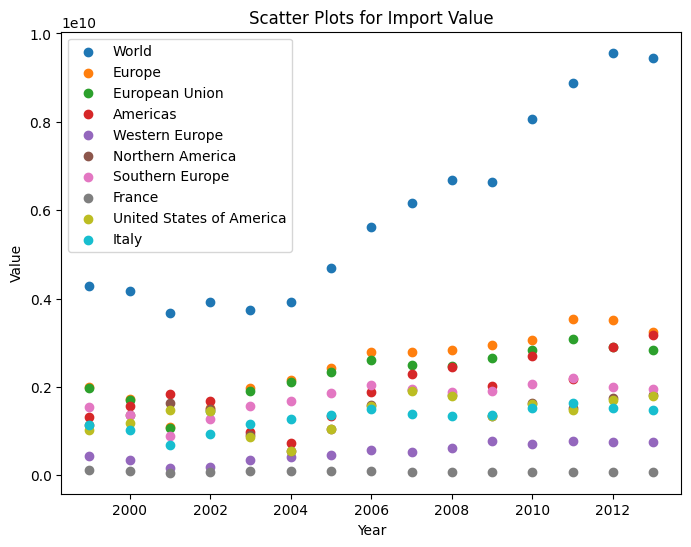

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df2 is your DataFrame
# Read your dataset into a DataFrame if not already done
# df2 = pd.read_csv("your_dataset.csv")

# Get the unique values in the 'Element' column and sort them
unique_elements = sorted(df4['Element'].unique())

# Sort the DataFrame by the 'Element' column
sorted_df2 = df4.sort_values(by='Element')

# Filter the DataFrame for the last ten years
last_ten_years = sorted_df2[sorted_df2['Year'] >= sorted_df2['Year'].max() - 14]

# Get the top 10 countries based on the mean 'Value' over the last ten years
top_countries = last_ten_years.groupby('Country')['Value'].mean().sort_values(ascending=False).head(10).index

# Create scatter plots for the top 10 countries for each unique element
for element in unique_elements:
    plt.figure(figsize=(8, 6))
    plt.title(f'Scatter Plots for {element}')
    plt.xlabel('Year')
    plt.ylabel('Value')

    for country in top_countries:
        subset = last_ten_years[(last_ten_years['Element'] == element) & (last_ten_years['Country'] == country)]
        plt.scatter(subset['Year'], subset['Value'], label=country)

    plt.legend()
    plt.show()


In [ ]:
import pandas as pd

# Assuming df2 is your DataFrame
# Read your dataset into a DataFrame if not already done
# df2 = pd.read_csv("your_dataset.csv")

# Get the unique values in the 'Element' column and sort them
unique_elements = sorted(df4['Element'].unique())

# Sort the DataFrame by the 'Element' column
sorted_df2 = df4.sort_values(by='Element')

# Filter the DataFrame for 'Import Quantity' and 'Europe'
europe_import_df = sorted_df2[(sorted_df2['Element'] == 'Import Quantity') & (sorted_df2['Country'] == 'Europe')]

# Filter the DataFrame for the years between 1999 and 2013
europe_import_years_df = europe_import_df[(europe_import_df['Year'] >= 1999) & (europe_import_df['Year'] <= 2013)]

# Iterate through each unique element
for element in unique_elements:
    print(f"Element: {element}")

    # Filter the DataFrame for the current element
    element_df = sorted_df2[sorted_df2['Element'] == element]

    # Check if there are significant changes in cattle import quantities in Europe
    significant_changes_df = europe_import_years_df[abs(europe_import_years_df['Value'].diff()) >= 100000]
    if not significant_changes_df.empty:
        print("Significant Changes Found in Europe:")
        print(significant_changes_df)


Element: Export Quantity
Significant Changes Found in Europe:
       Country          Element  Year      Value
601569  Europe  Import Quantity  1999  3720267.0
601573  Europe  Import Quantity  2003  3496228.0
601580  Europe  Import Quantity  2010  4107582.0
601570  Europe  Import Quantity  2000  3469294.0
601572  Europe  Import Quantity  2002  3319935.0
601571  Europe  Import Quantity  2001  2662631.0
Element: Export Value
Significant Changes Found in Europe:
       Country          Element  Year      Value
601569  Europe  Import Quantity  1999  3720267.0
601573  Europe  Import Quantity  2003  3496228.0
601580  Europe  Import Quantity  2010  4107582.0
601570  Europe  Import Quantity  2000  3469294.0
601572  Europe  Import Quantity  2002  3319935.0
601571  Europe  Import Quantity  2001  2662631.0
Element: Import Quantity
Significant Changes Found in Europe:
       Country          Element  Year      Value
601569  Europe  Import Quantity  1999  3720267.0
601573  Europe  Import Quantity  

Element: Export Quantity
Significant Changes Found in Europe:
       Country          Element  Year      Value
601569  Europe  Import Quantity  1999  3720267.0
601573  Europe  Import Quantity  2003  3496228.0
601580  Europe  Import Quantity  2010  4107582.0
601570  Europe  Import Quantity  2000  3469294.0
601572  Europe  Import Quantity  2002  3319935.0
601571  Europe  Import Quantity  2001  2662631.0


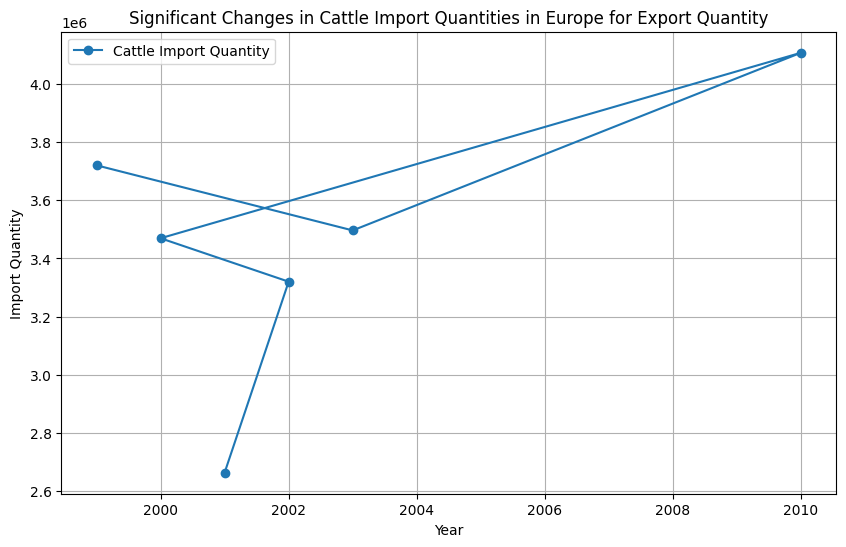

Element: Export Value
Significant Changes Found in Europe:
       Country          Element  Year      Value
601569  Europe  Import Quantity  1999  3720267.0
601573  Europe  Import Quantity  2003  3496228.0
601580  Europe  Import Quantity  2010  4107582.0
601570  Europe  Import Quantity  2000  3469294.0
601572  Europe  Import Quantity  2002  3319935.0
601571  Europe  Import Quantity  2001  2662631.0


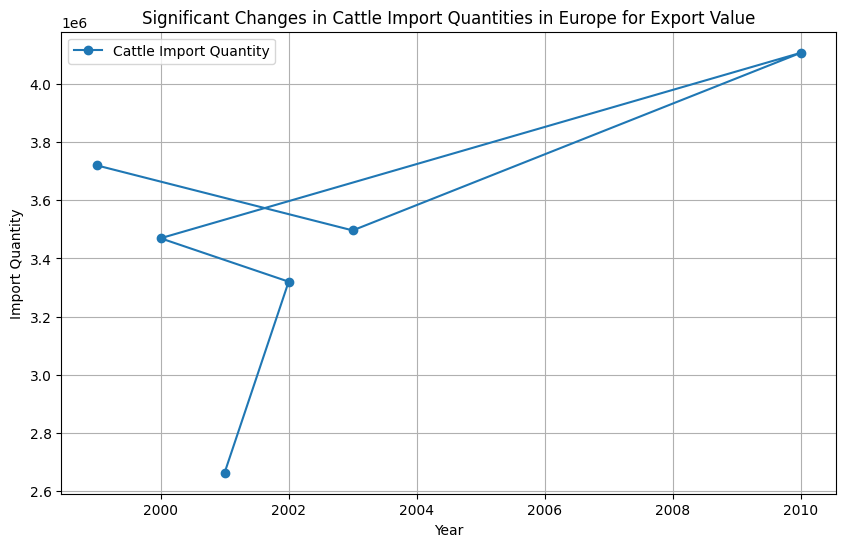

Element: Import Quantity
Significant Changes Found in Europe:
       Country          Element  Year      Value
601569  Europe  Import Quantity  1999  3720267.0
601573  Europe  Import Quantity  2003  3496228.0
601580  Europe  Import Quantity  2010  4107582.0
601570  Europe  Import Quantity  2000  3469294.0
601572  Europe  Import Quantity  2002  3319935.0
601571  Europe  Import Quantity  2001  2662631.0


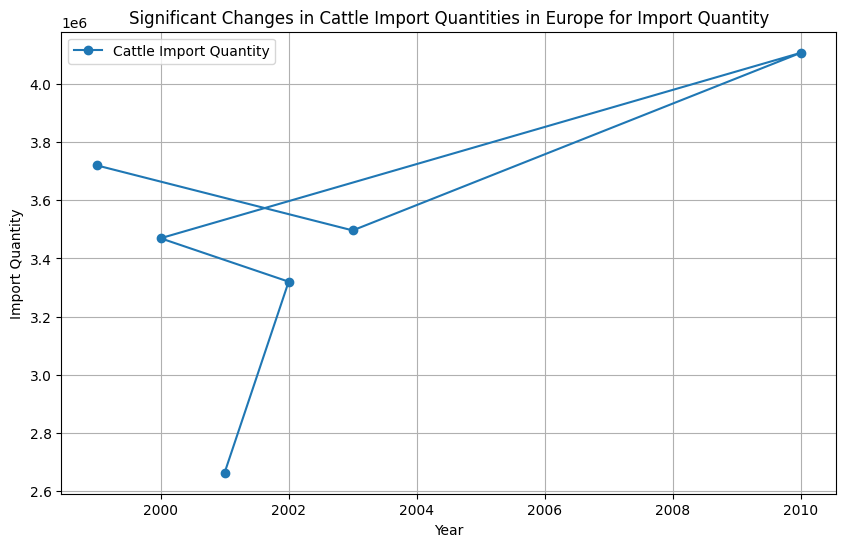

Element: Import Value
Significant Changes Found in Europe:
       Country          Element  Year      Value
601569  Europe  Import Quantity  1999  3720267.0
601573  Europe  Import Quantity  2003  3496228.0
601580  Europe  Import Quantity  2010  4107582.0
601570  Europe  Import Quantity  2000  3469294.0
601572  Europe  Import Quantity  2002  3319935.0
601571  Europe  Import Quantity  2001  2662631.0


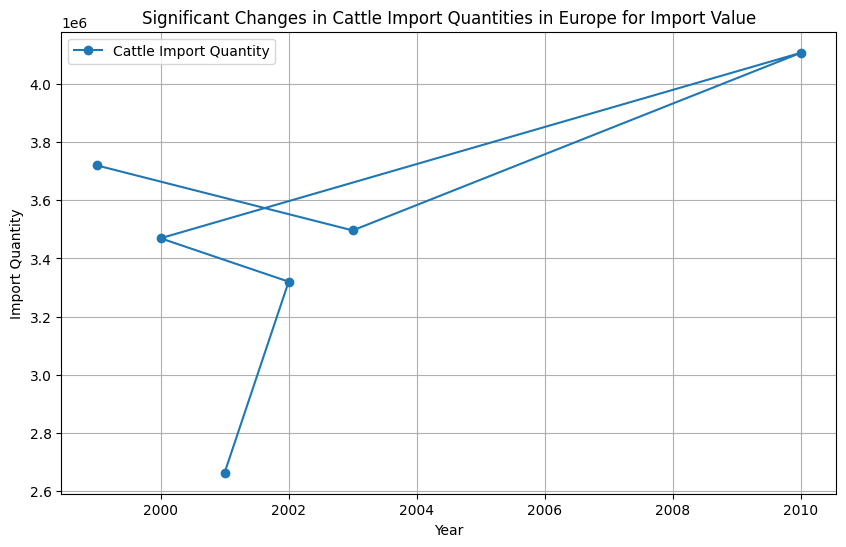

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df2 is your DataFrame
# Read your dataset into a DataFrame if not already done
# df2 = pd.read_csv("your_dataset.csv")

# Get the unique values in the 'Element' column and sort them
unique_elements = sorted(df4['Element'].unique())

# Sort the DataFrame by the 'Element' column
sorted_df2 = df4.sort_values(by='Element')

# Filter the DataFrame for 'Import Quantity' and 'Europe'
europe_import_df = sorted_df2[(sorted_df2['Element'] == 'Import Quantity') & (sorted_df2['Country'] == 'Europe')]

# Filter the DataFrame for the years between 1999 and 2013
europe_import_years_df = europe_import_df[(europe_import_df['Year'] >= 1999) & (europe_import_df['Year'] <= 2013)]

# Iterate through each unique element
for element in unique_elements:
    print(f"Element: {element}")

    # Filter the DataFrame for the current element
    element_df = sorted_df2[sorted_df2['Element'] == element]

    # Check if there are significant changes in cattle import quantities in Europe
    significant_changes_df = europe_import_years_df[abs(europe_import_years_df['Value'].diff()) >= 100000]
    if not significant_changes_df.empty:
        print("Significant Changes Found in Europe:")
        print(significant_changes_df)

        # Create a line graph showing the significant changes
        plt.figure(figsize=(10, 6))
        plt.plot(significant_changes_df['Year'], significant_changes_df['Value'], marker='o', label='Cattle Import Quantity')
        plt.title(f'Significant Changes in Cattle Import Quantities in Europe for {element}')
        plt.xlabel('Year')
        plt.ylabel('Import Quantity')
        plt.legend()
        plt.grid()
        plt.show()


In [ ]:
import pandas as pd

# Assuming df2 is your DataFrame
# Read your dataset into a DataFrame if not already done
# df2 = pd.read_csv("your_dataset.csv")

# Get the unique values in the 'Element' column and sort them
unique_elements = sorted(df2['Element'].unique())

# Sort the DataFrame by the 'Element' column
sorted_df2 = df2.sort_values(by='Element')

# Filter the DataFrame for 'Import Quantity'
import_df = sorted_df2[sorted_df2['Element'] == 'Import Quantity']

# Filter the DataFrame for the years between 2008 and 2010
import_years_df = import_df[(import_df['Year'] >= 2008) & (import_df['Year'] <= 2010)]

# Initialize variables to keep track of the country with the most significant change
max_changes_country = None
max_changes_count = 0

# Iterate through each country and calculate significant changes
for country in import_years_df['Country'].unique():
    country_df = import_years_df[import_years_df['Country'] == country]

    # Calculate the count of significant changes for the country
    significant_changes_count = len(country_df[abs(country_df['Value'].diff()) >= 100000])

    # Check if the current country has more significant changes
    if significant_changes_count > max_changes_count:
        max_changes_country = country
        max_changes_count = significant_changes_count

print("Country with the Most Significant Changes between 2008 and 2010:")
if max_changes_country is not None:
    print(f"Country: {max_changes_country}, Significant Changes Count: {max_changes_count}")
else:
    print("No significant changes found.")


Country with the Most Significant Changes between 2008 and 2010:
Country: Northern America, Significant Changes Count: 2


Country with the Most Significant Changes between 2008 and 2010:
Country: Venezuela (Bolivarian Republic of), Significant Changes Count: 2


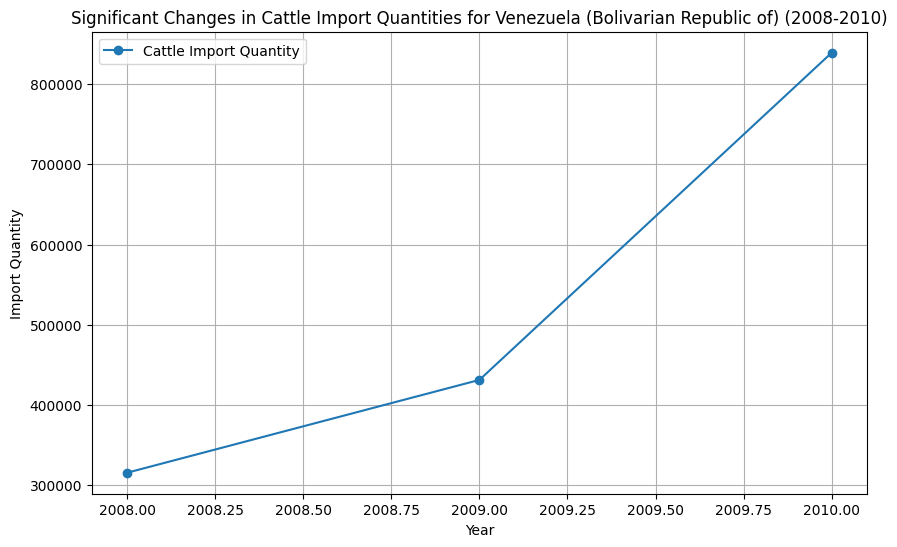

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df2 is your DataFrame
# Read your dataset into a DataFrame if not already done
# df2 = pd.read_csv("your_dataset.csv")

# Get the unique values in the 'Element' column and sort them
unique_elements = sorted(df4['Element'].unique())

# Sort the DataFrame by the 'Element' column
sorted_df2 = df4.sort_values(by='Element')

# Filter the DataFrame for 'Import Quantity'
import_df = sorted_df2[sorted_df2['Element'] == 'Import Quantity']

# Filter the DataFrame for the years between 2008 and 2010
import_years_df = import_df[(import_df['Year'] >= 2008) & (import_df['Year'] <= 2010)]

# Initialize variables to keep track of the country with the most significant change
max_changes_country = None
max_changes_count = 0

# Iterate through each country and calculate significant changes
for country in import_years_df['Country'].unique():
    country_df = import_years_df[import_years_df['Country'] == country]

    # Calculate the count of significant changes for the country
    significant_changes_count = len(country_df[abs(country_df['Value'].diff()) >= 100000])

    # Check if the current country has more significant changes
    if significant_changes_count > max_changes_count:
        max_changes_country = country
        max_changes_count = significant_changes_count

print("Country with the Most Significant Changes between 2008 and 2010:")
if max_changes_country is not None:
    print(f"Country: {max_changes_country}, Significant Changes Count: {max_changes_count}")

    # Create a line graph showing the significant changes for the selected country
    selected_country_df = import_years_df[import_years_df['Country'] == max_changes_country]
    plt.figure(figsize=(10, 6))
    plt.plot(selected_country_df['Year'], selected_country_df['Value'], marker='o', label='Cattle Import Quantity')
    plt.title(f'Significant Changes in Cattle Import Quantities for {max_changes_country} (2008-2010)')
    plt.xlabel('Year')
    plt.ylabel('Import Quantity')
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("No significant changes found.")


In [ ]:
import pandas as pd

# Assuming df2 is your DataFrame
# Read your dataset into a DataFrame if not already done
# df2 = pd.read_csv("your_dataset.csv")

# Get the unique values in the 'Element' column and sort them
unique_elements = sorted(df2['Element'].unique())

# Sort the DataFrame by the 'Element' column
sorted_df2 = df2.sort_values(by='Element')

# Filter the DataFrame for 'Import Quantity'
import_df = sorted_df2[sorted_df2['Element'] == 'Import Quantity']

# Filter the DataFrame for the years between 1999 and 2003
import_years_df = import_df[(import_df['Year'] >= 1999) & (import_df['Year'] <= 2003)]

# Initialize variables to keep track of the country with the most significant change
max_changes_country = None
max_changes_count = 0

# Iterate through each country and calculate significant changes
for country in import_years_df['Country'].unique():
    country_df = import_years_df[import_years_df['Country'] == country]

    # Calculate the count of significant changes for the country
    significant_changes_count = len(country_df[abs(country_df['Value'].diff()) >= 100000])

    # Check if the current country has more significant changes
    if significant_changes_count > max_changes_count:
        max_changes_country = country
        max_changes_count = significant_changes_count

print("Country with the Most Significant Changes between 1999 and 2003:")
if max_changes_country is not None:
    print(f"Country: {max_changes_country}, Significant Changes Count: {max_changes_count}")
else:
    print("No significant changes found.")


Country with the Most Significant Changes between 1999 and 2003:
Country: Americas, Significant Changes Count: 4


Country with the Most Significant Changes between 1999 and 2003:
Country: Americas, Significant Changes Count: 4


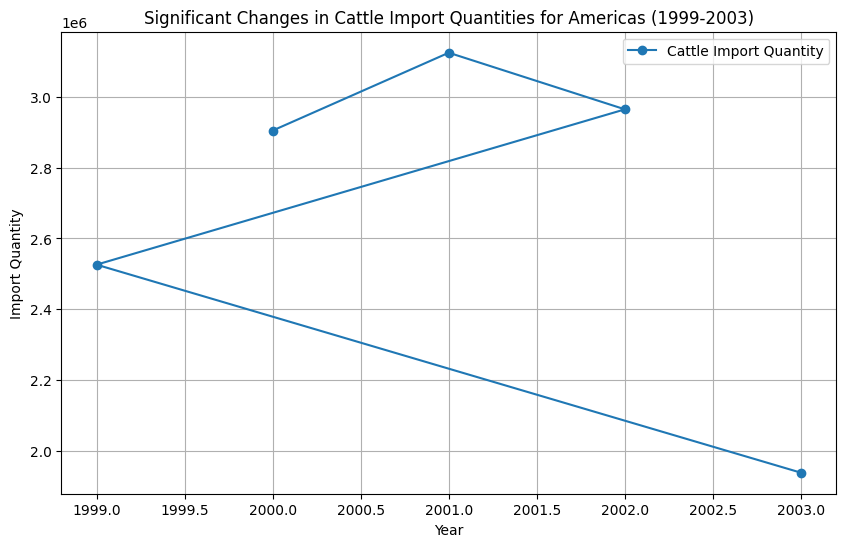

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df2 is your DataFrame
# Read your dataset into a DataFrame if not already done
# df2 = pd.read_csv("your_dataset.csv")

# Get the unique values in the 'Element' column and sort them
unique_elements = sorted(df4['Element'].unique())

# Sort the DataFrame by the 'Element' column
sorted_df2 = df4.sort_values(by='Element')

# Filter the DataFrame for 'Import Quantity'
import_df = sorted_df2[sorted_df2['Element'] == 'Import Quantity']

# Filter the DataFrame for the years between 1999 and 2003
import_years_df = import_df[(import_df['Year'] >= 1999) & (import_df['Year'] <= 2003)]

# Initialize variables to keep track of the country with the most significant change
max_changes_country = None
max_changes_count = 0

# Iterate through each country and calculate significant changes
for country in import_years_df['Country'].unique():
    country_df = import_years_df[import_years_df['Country'] == country]

    # Calculate the count of significant changes for the country
    significant_changes_count = len(country_df[abs(country_df['Value'].diff()) >= 100000])

    # Check if the current country has more significant changes
    if significant_changes_count > max_changes_count:
        max_changes_country = country
        max_changes_count = significant_changes_count

print("Country with the Most Significant Changes between 1999 and 2003:")
if max_changes_country is not None:
    print(f"Country: {max_changes_country}, Significant Changes Count: {max_changes_count}")

    # Create a line graph showing the significant changes for the selected country
    selected_country_df = import_years_df[import_years_df['Country'] == max_changes_country]
    plt.figure(figsize=(10, 6))
    plt.plot(selected_country_df['Year'], selected_country_df['Value'], marker='o', label='Cattle Import Quantity')
    plt.title(f'Significant Changes in Cattle Import Quantities for {max_changes_country} (1999-2003)')
    plt.xlabel('Year')
    plt.ylabel('Import Quantity')
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("No significant changes found.")


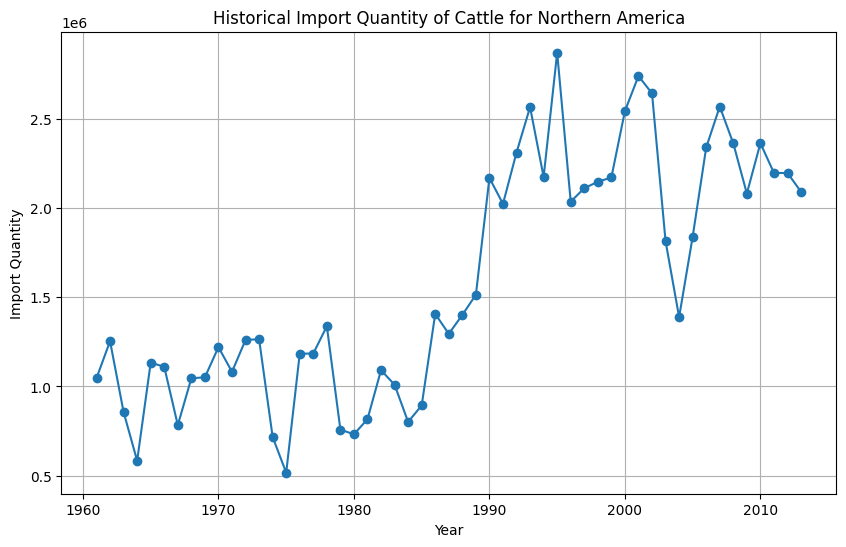

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

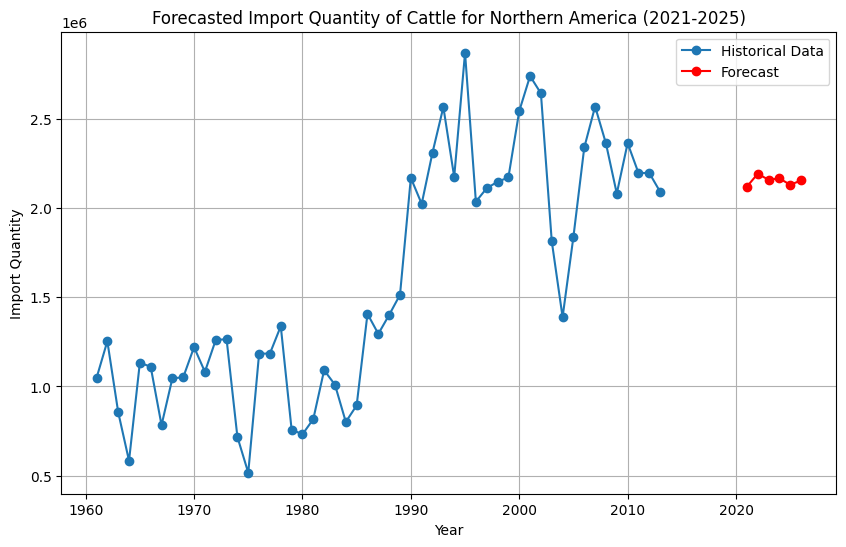

Forecasted Import Quantity for Northern America in 2025: 2155210.26


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming df2 is your DataFrame
# Read your dataset into a DataFrame if not already done
# df2 = pd.read_csv("your_dataset.csv")

# Get the unique values in the 'Element' column and sort them
unique_elements = sorted(df4['Element'].unique())

# Sort the DataFrame by the 'Element' column
sorted_df2 = df4.sort_values(by='Element')

# Filter the DataFrame for 'Import Quantity' and 'Northern America'
import_north_america_df = sorted_df2[(sorted_df2['Element'] == 'Import Quantity') & (sorted_df2['Country'] == 'Northern America')]

# Group data by year and calculate the total import quantity for each year
import_north_america_yearly = import_north_america_df.groupby('Year')['Value'].sum()

# Plot the historical import quantity data
plt.figure(figsize=(10, 6))
plt.plot(import_north_america_yearly.index, import_north_america_yearly, marker='o')
plt.title('Historical Import Quantity of Cattle for Northern America')
plt.xlabel('Year')
plt.ylabel('Import Quantity')
plt.grid()
plt.show()

# Fit an ARIMA model to the data
model = ARIMA(import_north_america_yearly, order=(5, 1, 1))
model_fit = model.fit()

# Forecast future values
forecast_steps = 6  # Forecast for the next 6 years (including 2025)
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(import_north_america_yearly.index, import_north_america_yearly, marker='o', label='Historical Data')
plt.plot(range(2021, 2021 + forecast_steps), forecast, marker='o', color='red', label='Forecast')
plt.title('Forecasted Import Quantity of Cattle for Northern America (2021-2025)')
plt.xlabel('Year')
plt.ylabel('Import Quantity')
plt.legend()
plt.grid()
plt.show()

# Print the forecasted value for 2025
forecast_2025 = forecast.iloc[-1]  # Get the last forecasted value for 2025
print(f"Forecasted Import Quantity for Northern America in 2025: {forecast_2025:.2f}")


**Step 5. Data Preprocessing:**

5.1. Feature engineering: Create some new features from the df dataset to enhance model performance.
5.2. Data encoding: Convert categorical variables into numerical representations.
5.3. Data scaling: Scale numerical features to bring them within a similar range.
5.4. Dimensionality reduction: Apply techniques like PCA to reduce the number of features.

<ipython-input-197-f222609924b3>:32: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = top_10_countries_df.pivot('Country', 'Year', 'Value')


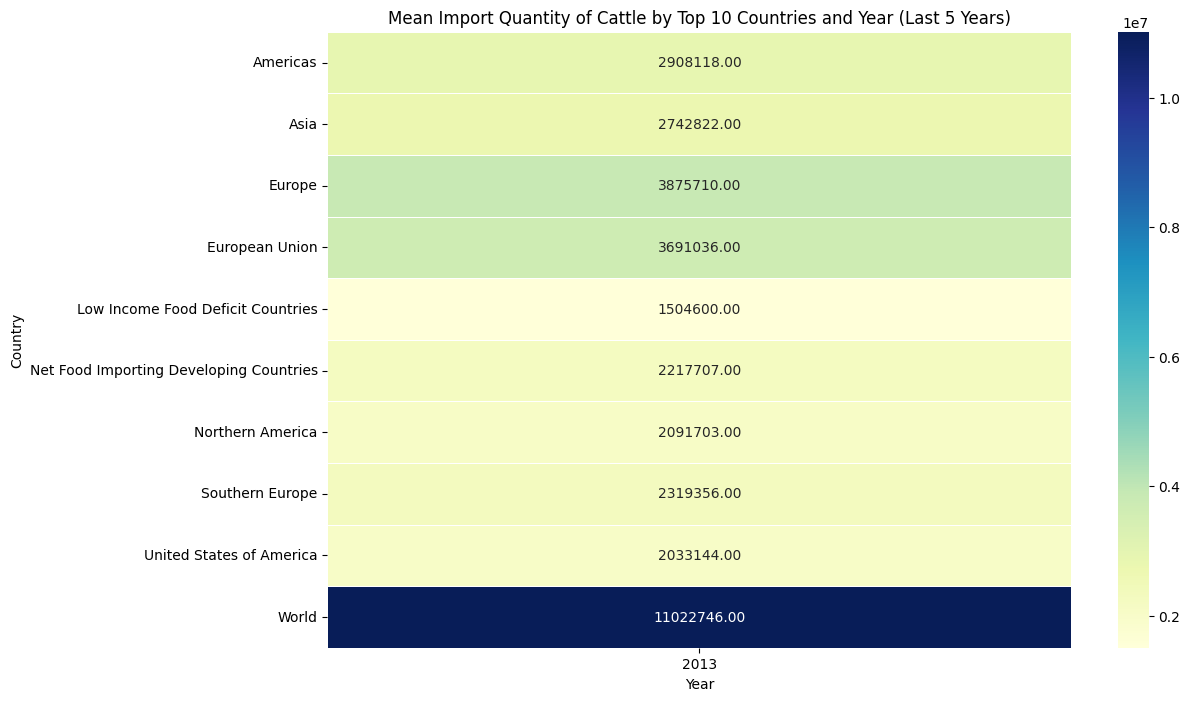

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df2 is your DataFrame
# Read your dataset into a DataFrame if not already done
# df2 = pd.read_csv("your_dataset.csv")

# Get the unique values in the 'Element' column and sort them
unique_elements = sorted(df4['Element'].unique())

# Sort the DataFrame by the 'Element' column
sorted_df2 = df4.sort_values(by='Element')

# Filter the DataFrame for 'Import Quantity'
import_quantity_df = sorted_df2[sorted_df2['Element'] == 'Import Quantity']

# Filter the DataFrame for the last 10 years
current_year = 2023  # Change this to the current year
last_10_years_df = import_quantity_df[import_quantity_df['Year'] >= current_year - 10]

# Group data by country and year, and calculate the mean import quantity
mean_import_by_country_year = last_10_years_df.groupby(['Country', 'Year'])['Value'].mean().reset_index()

# Get the top 10 countries by mean import quantity
top_10_countries = mean_import_by_country_year.groupby('Country')['Value'].mean().sort_values(ascending=False).head(10).index

# Filter the data for the top 10 countries
top_10_countries_df = mean_import_by_country_year[mean_import_by_country_year['Country'].isin(top_10_countries)]

# Create a pivot table for heatmap visualization
heatmap_data = top_10_countries_df.pivot('Country', 'Year', 'Value')

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title('Mean Import Quantity of Cattle by Top 10 Countries and Year (Last 5 Years)')
plt.xlabel('Year')
plt.ylabel('Country')
plt.show()


**Step 6. Data Transformation:**

6.1. Apply transformations like log or square root to handle skewed data.

6.2. Handle multicollinearity among features to avoid model instability.

6.3. Perform one-hot encoding or label encoding for categorical variables.

**Step 7. Data Sampling:**

7.1. Determine if data imbalances exist and consider techniques like oversampling or undersampling.


**Step 8. Data Exploration:**


**Step 9. Hypothesis Formulation:**

9.1. Define the null and alternative hypotheses based on the research questions.

9.2. Determine the appropriate statistical tests to evaluate the hypotheses.

9.3. Set the significance level for hypothesis testing.

**Descriptive Question:** What is the trend in import quantity of cattle across different countries over the years?

Hypothesis Test: One-Way ANOVA (Analysis of Variance) to determine if there are significant differences in import quantities among different countries over the years.

Statistical Analysis: Calculate the mean and standard deviation of import quantities for each country. Perform ANOVA and post-hoc tests (e.g., Tukey's HSD) to identify countries with significantly different import quantities.

**Predictive Question:** Can we predict the future import quantity of cattle for a specific country?

Hypothesis Test: None (this question is more focused on prediction than hypothesis testing).

Statistical Analysis: Time Series Analysis, possibly using techniques like ARIMA (AutoRegressive Integrated Moving Average) or Prophet, to build a predictive model. Evaluate the model's performance using metrics like Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE).

**Prescriptive Question:** What strategies can be implemented to optimize cattle import quantities while considering different countries and years?

Hypothesis Test: Two-Sample T-Test to compare the mean import quantities between two different groups (e.g., countries with different economic conditions).

Statistical Analysis: Divide countries into relevant groups (e.g., high GDP vs. low GDP) and perform a T-Test to determine if there's a significant difference in import quantities. Analyze effect sizes to understand the practical significance

**Step 12. Statistical Analysis:**

12.1. Conduct the selected statistical tests on relevant data subsets.

Example code to perform this ... Appropriate Statistical Test: To test for significant shifts in cattle import sources among countries, you might consider using a Chi-Square test for independence or multinomial logistic regression, depending on the nature of your data and the factors influencing the shifts. Calculate also the effect size using an appropriate measure.

12.2. Interpret the results of hypothesis tests to draw meaningful conclusions.

Interpret the results of the first hypothesis test. Use this result as an input ... Consider p-values and effect sizes to determine the significance of this findings.

12.3. Consider p-values and effect sizes to determine the significance of this findings.


Step 13. Machine Learning Model Selection:

13.1. Propose alternative machine learning algorithms based on the problem type


13.2. Select a set of candidate models to proceed with further evaluation.


Step 14. Model Training and Evaluation:

14.1. Split the dataset into training and validation sets for model training and evaluation.
14.2. Train the selected models on the training set using appropriate performance metrics.
14.3. Evaluate model performance on the validation set and compare results.
14.4. Elaborate the best model

Step 15. Feature Importance and Selection:

15.1. Use feature importance techniques like feature importance scores or feature selection algorithms.
15.2. Identify the most relevant features that contribute significantly to the model's performance.

Step 16. Model Tuning:

16.1. Perform hyperparameter tuning for the selected machine learning models.
16.2. Use techniques like grid search or random search to optimize model performance.

Step 17. Model Interpretation:

17.1. Analyze model outputs and interpret model predictions.
17.2. Use techniques like SHAP values or partial dependence plots to understand feature effects.




Step 18. Insights and Key Findings:

18.1. Summarize the main insights and key findings from the analysis.
18.2. Link the findings to the initial business objectives and research questions.

Step 19. Data Storytelling:

19.1. Craft a narrative around the data, incorporating key findings and insights.
19.2. Present the data story in a compelling and understandable manner to stakeholders.





Step 20. Sensitivity Analysis:

20.1. Conduct sensitivity analysis on critical model parameters or assumptions.
20.2. Assess how changes in these variables impact the overall results.



Step 21. Limitations and Assumptions:

21.1. Identify and document any limitations or assumptions made during the analysis.
21.2. Communicate the potential impact of these limitations on the findings.

Step 22. Conclusion:

22.1. Summarize the project's outcome, identified key insights, and the overall success in achieving the business objectives.
22.2. Reflect on the data analysis process and its effectiveness.

Step 23. Recommendations:

23.1. Provide actionable recommendations based on the insights gained from the analysis.
23.2. Suggest potential strategies for addressing the identified business problem.




Step 24. Documentation:

24.1. Create comprehensive documentation of the entire data analytics process, including data sources, methodologies, and tools used.

Step 25. Quality Assurance:

25.1. Implement quality assurance measures to validate the accuracy and reliability of the analysis.
25.2. Review the analysis process for potential errors or inconsistencies.

Step 26. Data Governance and Security:

26.1. Ensure compliance with data governance policies and regulations.
26.2. Protect sensitive data and maintain data security throughout the analysis.

Step 27. Data Ethics:

27.1. Consider and address ethical implications related to data collection, analysis, and model deployment.
27.2. Avoid bias and ensure fairness in the analysis.

Step 28. Project Management:

28.1. Develop a project plan with clear timelines and milestones.
28.2. Track progress throughout the project to ensure timely completion.

Step 29. Communication:

29.1. Plan how the findings will be communicated to stakeholders.
29.2. Tailor the communication approach based on the audience's technical knowledge.

Step 30. Feedback and Iteration:

30.1. Seek feedback from stakeholders on the analysis and recommendations.
30.2. Incorporate feedback to improve the analysis and address any concerns.

Step 31. Model Deployment:

31.1. Prepare the model for deployment in a production environment.
31.2. Monitor the model's performance and make necessary adjustments over time.
31.3. Perform A/B Testing
32. Create comprehensive documentation of the entire data analytics process, including data sources, methodologies, and tools used.